In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
human_seoul = pd.read_csv('human_seoul.csv')
human_seoul[:4]

시군구명      계
0  종로구  11531
1  종로구   9104
2  종로구   2301
3  종로구   9168

In [3]:
market_seoul = pd.read_csv('market_seoul.csv')
market_seoul[:4]

상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명        표준산업분류명    시도명 시군구명  행정동명
0     영자's곱창       음식       한식  곱창 전골/구이     한식 일반 음식점업  서울특별시  광진구  중곡3동
1      호텔클로이       숙박    일반 숙박     여관/모텔            여관업  서울특별시   중구   광희동
2  나라차중계태권도장       교육    기타 교육  태권도/무술학원  태권도 및 무술 교육기관  서울특별시  노원구  중계본동
3      이상한스냅    과학·기술    사진 촬영     사진촬영업         사진 처리업  서울특별시  양천구  신월5동

# 가설 1 사람이 많은 지역이 상권이 많을 것이다

In [4]:
# human_seoul : 구 별로 인구 수 구하기
g_human_gu = human_seoul.groupby('시군구명').계.sum().to_frame()
g_human_gu = g_human_gu.sort_values(by='계',ascending=False)
g_human_gu.rename(columns={'계':'인구수'},inplace=True)

In [5]:
g_human_gu

인구수
시군구명        
송파구   657665
강서구   567883
강남구   534646
노원구   501838
관악구   487641
은평구   464217
강동구   459567
양천구   438848
성북구   429751
서초구   404539
구로구   395099
중랑구   384867
동작구   380385
영등포구  376423
마포구   365287
동대문구  337692
광진구   336558
도봉구   310023
서대문구  308338
강북구   292383
성동구   279980
금천구   229328
용산구   217611
종로구   140891
중구    121250

In [6]:
# market_seoul 컬럼 순서 변경
new_columns=['시도명','시군구명','행정동명','상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','표준산업분류명']

market_seoul=market_seoul.reindex(columns=new_columns)
market_seoul[:2]

시도명 시군구명  행정동명     상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명     표준산업분류명
0  서울특별시  광진구  중곡3동  영자's곱창       음식       한식  곱창 전골/구이  한식 일반 음식점업
1  서울특별시   중구   광희동   호텔클로이       숙박    일반 숙박     여관/모텔         여관업

In [7]:
# 시군구별로 상권수 구하기 
g_market_gu = market_seoul.groupby('시군구명').size().sort_values(ascending=False).to_frame()
g_market_gu.rename(columns={0:'상권수'},inplace=True)
g_market_gu

상권수
시군구명       
강남구   55953
서초구   33742
송파구   29691
마포구   26223
영등포구  25004
강서구   23419
중구    22359
종로구   18558
관악구   17412
구로구   16279
강동구   16259
광진구   16227
금천구   16070
성동구   15195
동대문구  14786
은평구   14692
용산구   14234
양천구   13577
성북구   13539
중랑구   13310
노원구   13283
서대문구  12331
동작구   11625
강북구   11496
도봉구    8996

In [8]:
# 정제된 2개의 데이터 합치기
g_market_gu.insert(0,'인구수',g_human_gu)

In [9]:
g_market_gu

인구수    상권수
시군구명               
강남구   534646  55953
서초구   404539  33742
송파구   657665  29691
마포구   365287  26223
영등포구  376423  25004
강서구   567883  23419
중구    121250  22359
종로구   140891  18558
관악구   487641  17412
구로구   395099  16279
강동구   459567  16259
광진구   336558  16227
금천구   229328  16070
성동구   279980  15195
동대문구  337692  14786
은평구   464217  14692
용산구   217611  14234
양천구   438848  13577
성북구   429751  13539
중랑구   384867  13310
노원구   501838  13283
서대문구  308338  12331
동작구   380385  11625
강북구   292383  11496
도봉구   310023   8996

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'

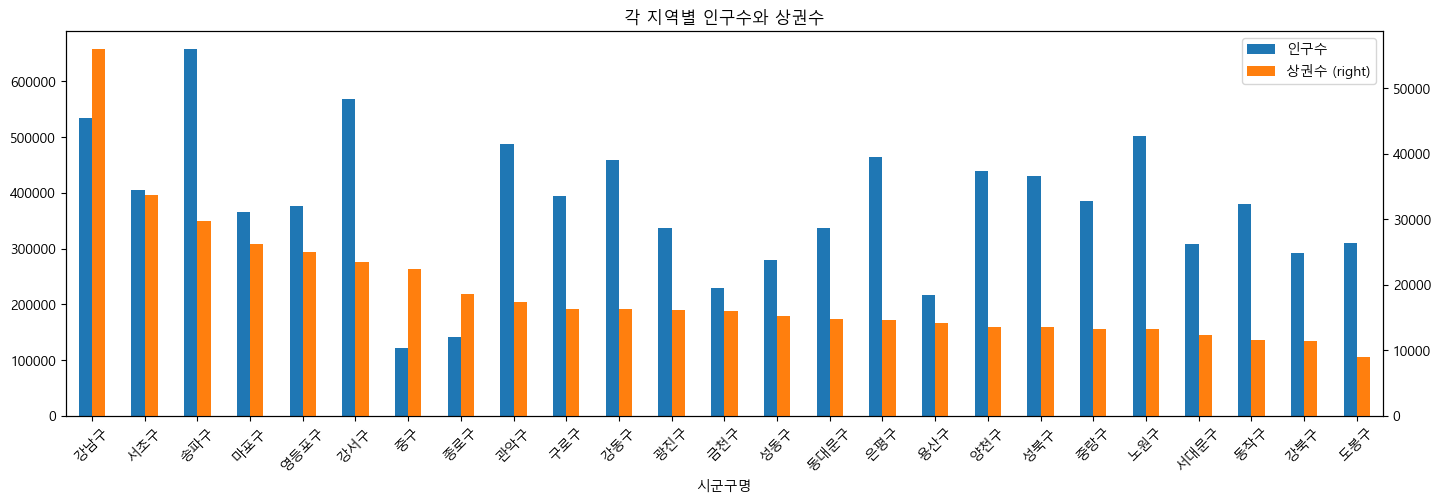

In [11]:
g_market_gu.plot(kind='bar',
                 figsize=(17,5),
                 rot=45,
                 title='각 지역별 인구수와 상권수',
                 secondary_y='상권수',
                )
plt.show()

- 서울지역 인구수는 송파구가 가장 많지만 상권수가 가장 많은 곳은 강남구이다
- 인구수가 가장 적은 곳은 중구지만 상권수가 가장 적은 곳은 도봉구이다
<br><br>
- 도봉구의 인구수가 중구에 비해 2배이상 많음에도 불구하고, 도봉구의 상권수가 중구에 비해 2배이상 낮다 
- 즉 인구수에 따른 상권수는 서로 상관관계가 없다

# 가설 2 인구에 따른 상권 분석 
- 인구가 가장 많은 송파구에는 음식점이 가장 많을 것이다
- 인구가 가장 적은 중구는 음식이 아닌 다른 상권이 더 많을 것이다

In [12]:
market_seoul[:2]

시도명 시군구명  행정동명     상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명     표준산업분류명
0  서울특별시  광진구  중곡3동  영자's곱창       음식       한식  곱창 전골/구이  한식 일반 음식점업
1  서울특별시   중구   광희동   호텔클로이       숙박    일반 숙박     여관/모텔         여관업

In [13]:
# 시군구 별로 분류후 상권업종대분류명으로 묶어서 pie로 보고 싶음
# 원하는데로 값이 나오지 않음....
# groupby를 잘못하고 있는 것 같음

In [14]:
g_gu_big=market_seoul[['시군구명','상권업종대분류명']].groupby('시군구명').value_counts(normalize=True).unstack()

In [15]:
g_gu_big

상권업종대분류명     과학·기술        교육      보건의료       부동산        소매     수리·개인   
시군구명                                                                   
강남구       0.304005  0.071703  0.032652  0.066449  0.155899  0.076403  \
강동구       0.088443  0.054001  0.017959  0.068454  0.248601  0.134879   
강북구       0.082289  0.034708  0.012178  0.054454  0.239301  0.146138   
강서구       0.147145  0.054101  0.014091  0.063111  0.212520  0.126948   
관악구       0.092637  0.046692  0.012233  0.062888  0.213646  0.133414   
광진구       0.116103  0.046836  0.011709  0.057867  0.240833  0.120601   
구로구       0.163585  0.043614  0.009337  0.047484  0.248357  0.109220   
금천구       0.306783  0.030056  0.007094  0.053827  0.205912  0.086310   
노원구       0.074607  0.069036  0.017240  0.047881  0.257020  0.132199   
도봉구       0.089707  0.047021  0.009004  0.056470  0.247443  0.148844   
동대문구      0.080346  0.038956  0.012038  0.057960  0.284458  0.120722   
동작구       0.090151  0.060043  0.013591  0.069935  0.209806  0.126452   
마포구       0.199863  0.060062  0.010906  0.046715  0.157114  0.091904   
서대문구      0.120590  0.058957  0.011272  0.056038  0.218879  0.108183   
서초구       0.340584  0.069468  0.022139  0.063748  0.174026  0.069024   
성동구       0.238631  0.045739  0.009016  0.053833  0.187167  0.103126   
성북구       0.087156  0.055913  0.011596  0.061674  0.239383  0.136051   
송파구       0.183389  0.057357  0.015223  0.062948  0.221481  0.108013   
양천구       0.090742  0.091110  0.016130  0.062164  0.244237  0.138322   
영등포구      0.221005  0.039754  0.011838  0.047832  0.203207  0.087786   
용산구       0.144864  0.038640  0.008220  0.062035  0.261416  0.079458   
은평구       0.086033  0.050640  0.013613  0.078478  0.239314  0.141846   
종로구       0.142796  0.037773  0.009376  0.034433  0.276754  0.057927   
중구        0.204973  0.017756  0.010734  0.031218  0.329845  0.050360   
중랑구       0.088881  0.034335  0.011871  0.057626  0.248685  0.151916   

상권업종대분류명        숙박   시설관리·임대    예술·스포츠        음식  
시군구명                                              
강남구       0.007435  0.048702  0.030186  0.206566  
강동구       0.011809  0.038440  0.052586  0.284827  
강북구       0.016093  0.031663  0.058107  0.325070  
강서구       0.007985  0.047312  0.048038  0.278748  
관악구       0.025098  0.031358  0.063921  0.318114  
광진구       0.012140  0.041351  0.056203  0.296358  
구로구       0.013330  0.043184  0.050187  0.271700  
금천구       0.007156  0.052458  0.034536  0.215868  
노원구       0.007303  0.028232  0.066175  0.300309  
도봉구       0.005892  0.031792  0.058915  0.304913  
동대문구      0.020087  0.032531  0.046395  0.306506  
동작구       0.030796  0.034323  0.055914  0.308989  
마포구       0.019220  0.054990  0.031995  0.327232  
서대문구      0.020923  0.045333  0.039088  0.320736  
서초구       0.005868  0.047656  0.029222  0.178264  
성동구       0.009477  0.044554  0.033564  0.274893  
성북구       0.013295  0.028584  0.045350  0.320999  
송파구       0.008386  0.038833  0.050554  0.253814  
양천구       0.004419  0.029830  0.057524  0.265523  
영등포구      0.014438  0.057271  0.043153  0.273716  
용산구       0.017002  0.035268  0.024027  0.329071  
은평구       0.009733  0.031786  0.047509  0.301048  
종로구       0.028505  0.062722  0.024572  0.325143  
중구        0.023928  0.071738  0.018337  0.241111  
중랑구       0.011270  0.036514  0.058302  0.300601

In [16]:
# 특수기호가 포함되어있는 컬럼 수정
g_gu_big.columns

Index(['과학·기술', '교육', '보건의료', '부동산', '소매', '수리·개인', '숙박', '시설관리·임대', '예술·스포츠',
       '음식'],
      dtype='object', name='상권업종대분류명')

In [17]:
g_gu_big.rename(columns={'과학·기술': '과학.기술', '수리·개인': '수리.개인', '시설관리·임대': '시설관리.임대', '예술·스포츠': '예술.스포츠'},inplace=True)
g_gu_big

상권업종대분류명     과학.기술        교육      보건의료       부동산        소매     수리.개인   
시군구명                                                                   
강남구       0.304005  0.071703  0.032652  0.066449  0.155899  0.076403  \
강동구       0.088443  0.054001  0.017959  0.068454  0.248601  0.134879   
강북구       0.082289  0.034708  0.012178  0.054454  0.239301  0.146138   
강서구       0.147145  0.054101  0.014091  0.063111  0.212520  0.126948   
관악구       0.092637  0.046692  0.012233  0.062888  0.213646  0.133414   
광진구       0.116103  0.046836  0.011709  0.057867  0.240833  0.120601   
구로구       0.163585  0.043614  0.009337  0.047484  0.248357  0.109220   
금천구       0.306783  0.030056  0.007094  0.053827  0.205912  0.086310   
노원구       0.074607  0.069036  0.017240  0.047881  0.257020  0.132199   
도봉구       0.089707  0.047021  0.009004  0.056470  0.247443  0.148844   
동대문구      0.080346  0.038956  0.012038  0.057960  0.284458  0.120722   
동작구       0.090151  0.060043  0.013591  0.069935  0.209806  0.126452   
마포구       0.199863  0.060062  0.010906  0.046715  0.157114  0.091904   
서대문구      0.120590  0.058957  0.011272  0.056038  0.218879  0.108183   
서초구       0.340584  0.069468  0.022139  0.063748  0.174026  0.069024   
성동구       0.238631  0.045739  0.009016  0.053833  0.187167  0.103126   
성북구       0.087156  0.055913  0.011596  0.061674  0.239383  0.136051   
송파구       0.183389  0.057357  0.015223  0.062948  0.221481  0.108013   
양천구       0.090742  0.091110  0.016130  0.062164  0.244237  0.138322   
영등포구      0.221005  0.039754  0.011838  0.047832  0.203207  0.087786   
용산구       0.144864  0.038640  0.008220  0.062035  0.261416  0.079458   
은평구       0.086033  0.050640  0.013613  0.078478  0.239314  0.141846   
종로구       0.142796  0.037773  0.009376  0.034433  0.276754  0.057927   
중구        0.204973  0.017756  0.010734  0.031218  0.329845  0.050360   
중랑구       0.088881  0.034335  0.011871  0.057626  0.248685  0.151916   

상권업종대분류명        숙박   시설관리.임대    예술.스포츠        음식  
시군구명                                              
강남구       0.007435  0.048702  0.030186  0.206566  
강동구       0.011809  0.038440  0.052586  0.284827  
강북구       0.016093  0.031663  0.058107  0.325070  
강서구       0.007985  0.047312  0.048038  0.278748  
관악구       0.025098  0.031358  0.063921  0.318114  
광진구       0.012140  0.041351  0.056203  0.296358  
구로구       0.013330  0.043184  0.050187  0.271700  
금천구       0.007156  0.052458  0.034536  0.215868  
노원구       0.007303  0.028232  0.066175  0.300309  
도봉구       0.005892  0.031792  0.058915  0.304913  
동대문구      0.020087  0.032531  0.046395  0.306506  
동작구       0.030796  0.034323  0.055914  0.308989  
마포구       0.019220  0.054990  0.031995  0.327232  
서대문구      0.020923  0.045333  0.039088  0.320736  
서초구       0.005868  0.047656  0.029222  0.178264  
성동구       0.009477  0.044554  0.033564  0.274893  
성북구       0.013295  0.028584  0.045350  0.320999  
송파구       0.008386  0.038833  0.050554  0.253814  
양천구       0.004419  0.029830  0.057524  0.265523  
영등포구      0.014438  0.057271  0.043153  0.273716  
용산구       0.017002  0.035268  0.024027  0.329071  
은평구       0.009733  0.031786  0.047509  0.301048  
종로구       0.028505  0.062722  0.024572  0.325143  
중구        0.023928  0.071738  0.018337  0.241111  
중랑구       0.011270  0.036514  0.058302  0.300601

In [18]:
# 구를 지정해야지만 이쁘게 나옴 여러개의 구를 동시에 보고 싶음 ...

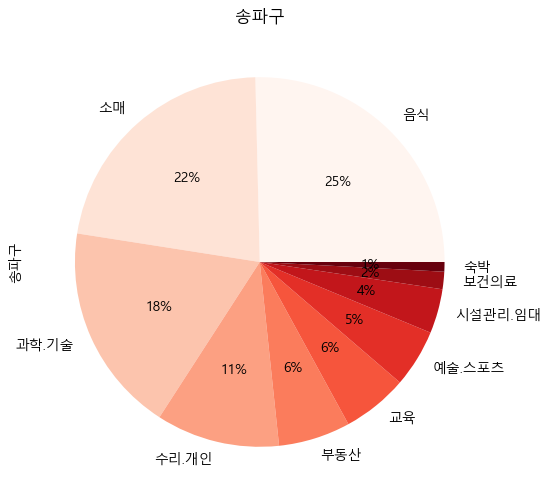

In [19]:
g_gu_big.loc['송파구'].sort_values(ascending=False).plot(kind='pie',
                                                       autopct='%0.f%%',
                                                       figsize=[6, 6],
                                                       colormap='Reds',
                                                       title='송파구'
                                                       )
plt.show()

In [20]:
# 원하지 않는 결과

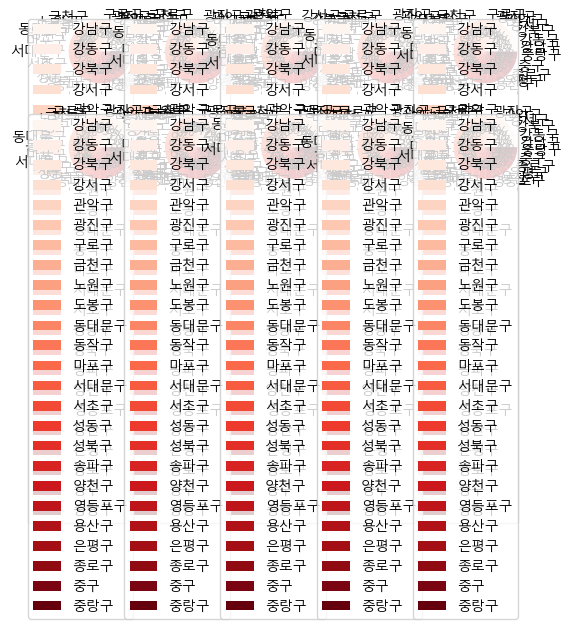

In [21]:
g_gu_big.plot(kind='pie', subplots=True, grid=True,
        layout=(5, 5), sharex=True, sharey=False, legend=True,   
                                                       autopct='%0.f%%',
                                                       figsize=[6, 6],
                                                       colormap='Reds',
                                                       )
plt.show()

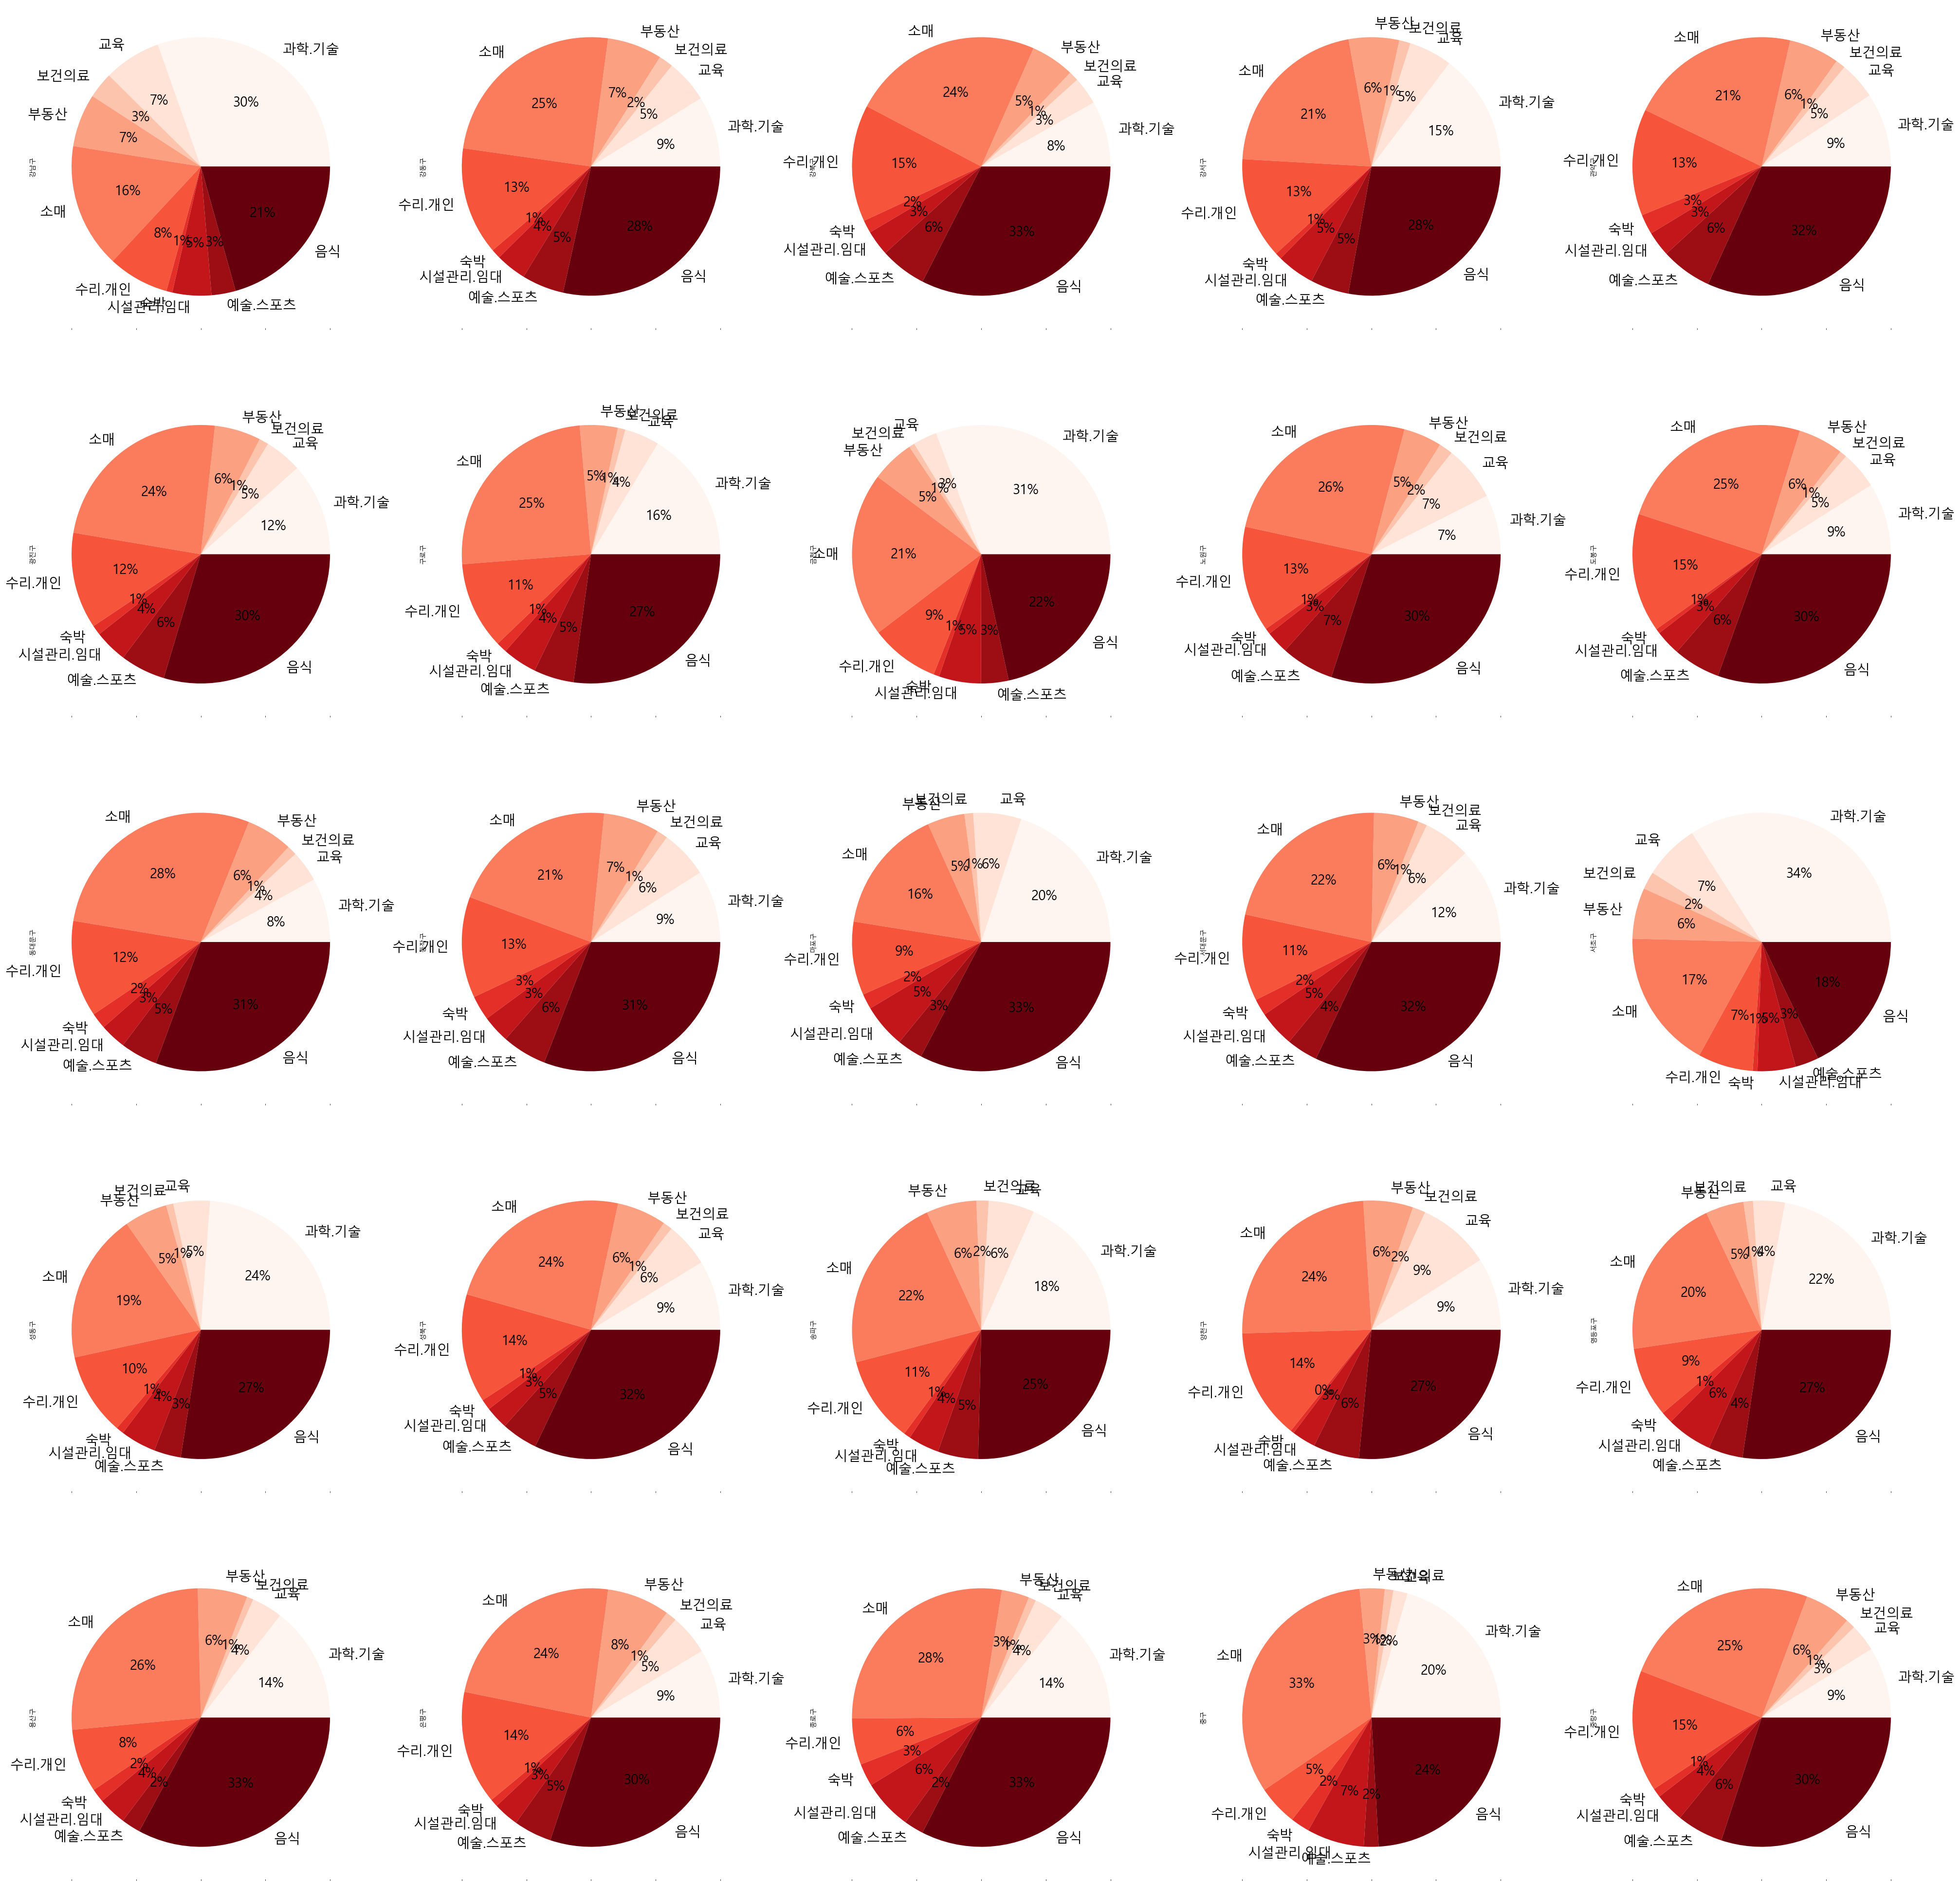

In [22]:
g_gu_big.T.plot(kind='pie', subplots=True,
                layout=(5, 5), legend=False,   
                autopct='%0.f%%',figsize=[50, 50],colormap='Reds',
                textprops={'size': 20}
               )
plt.show()

In [23]:
# 원하는데로 나오기는 했는데... 너무 작음 좀 더 크게 안되나 
# 여러개의 데이터를 한번에 pie차트로 만드니 각각 정렬을 해줘야 하고 , 폰트 사이즈관리?가 힘듬

In [24]:
x=g_gu_big.index
x.values

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [25]:
g_gu_big.T.강남구

상권업종대분류명
과학.기술      0.304005
교육         0.071703
보건의료       0.032652
부동산        0.066449
소매         0.155899
수리.개인      0.076403
숙박         0.007435
시설관리.임대    0.048702
예술.스포츠     0.030186
음식         0.206566
Name: 강남구, dtype: float64

In [26]:
for x in g_gu_big.index:
    print(g_gu_big.T[x])


상권업종대분류명
과학.기술      0.304005
교육         0.071703
보건의료       0.032652
부동산        0.066449
소매         0.155899
수리.개인      0.076403
숙박         0.007435
시설관리.임대    0.048702
예술.스포츠     0.030186
음식         0.206566
Name: 강남구, dtype: float64
상권업종대분류명
과학.기술      0.088443
교육         0.054001
보건의료       0.017959
부동산        0.068454
소매         0.248601
수리.개인      0.134879
숙박         0.011809
시설관리.임대    0.038440
예술.스포츠     0.052586
음식         0.284827
Name: 강동구, dtype: float64
상권업종대분류명
과학.기술      0.082289
교육         0.034708
보건의료       0.012178
부동산        0.054454
소매         0.239301
수리.개인      0.146138
숙박         0.016093
시설관리.임대    0.031663
예술.스포츠     0.058107
음식         0.325070
Name: 강북구, dtype: float64
상권업종대분류명
과학.기술      0.147145
교육         0.054101
보건의료       0.014091
부동산        0.063111
소매         0.212520
수리.개인      0.126948
숙박         0.007985
시설관리.임대    0.047312
예술.스포츠     0.048038
음식         0.278748
Name: 강서구, dtype: float64
상권업종대분류명
과학.기술      0.092637
교육         0.046692
보건의료       

In [27]:
# 처음에는 pie chart가 다 겹쳐서 나왔으나 plt.show()가 for문 안으로 들어오니 각 지역마다 나오게 됨 해결 
# 정렬또한 각 지역별로 각각 적용됨

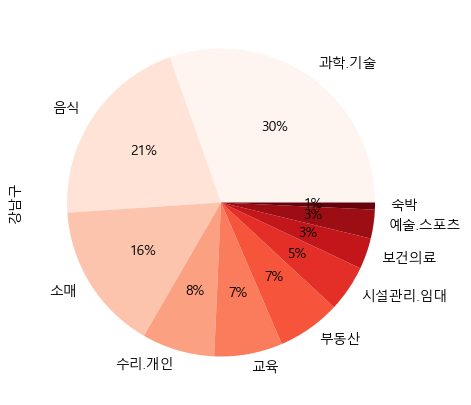

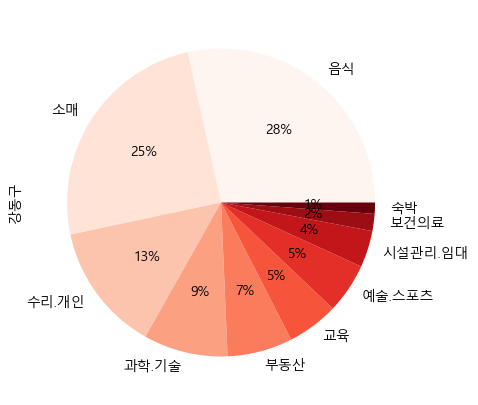

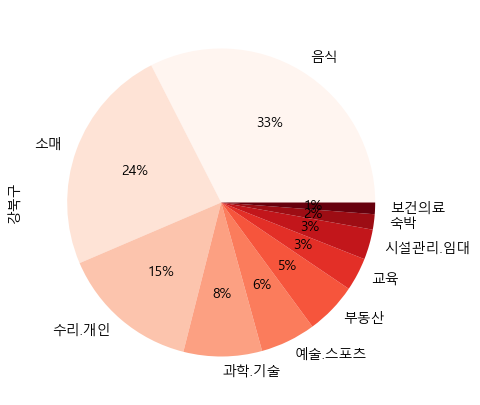

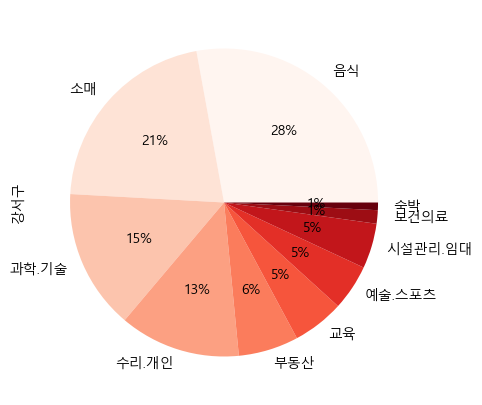

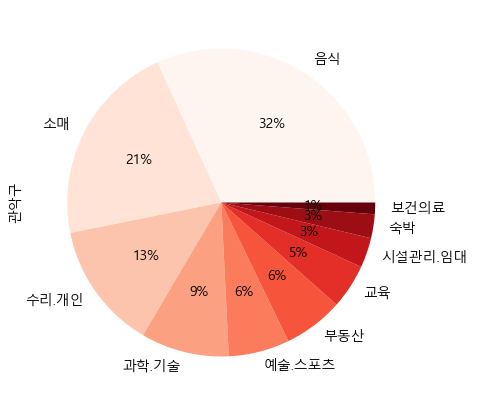

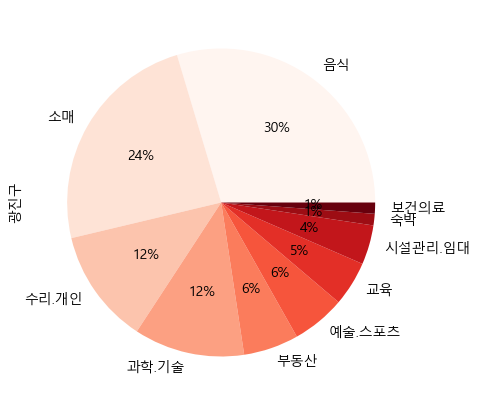

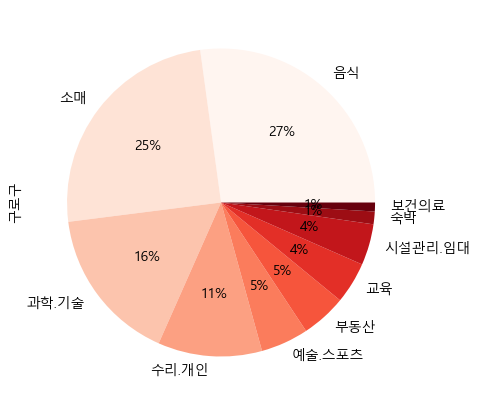

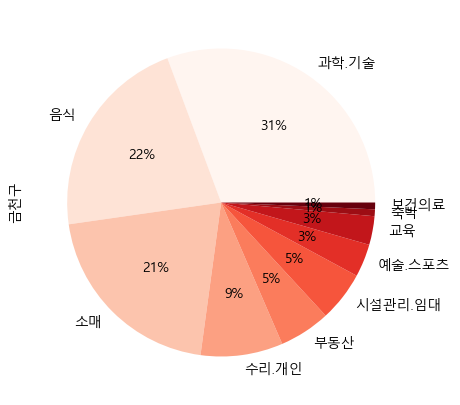

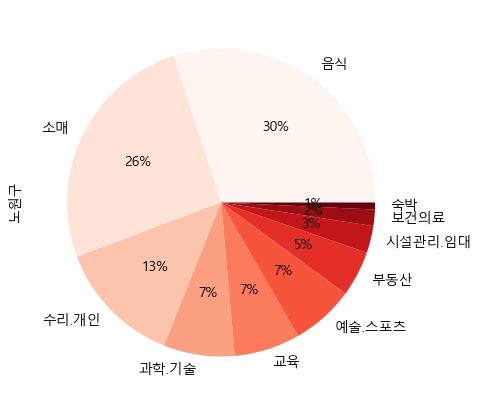

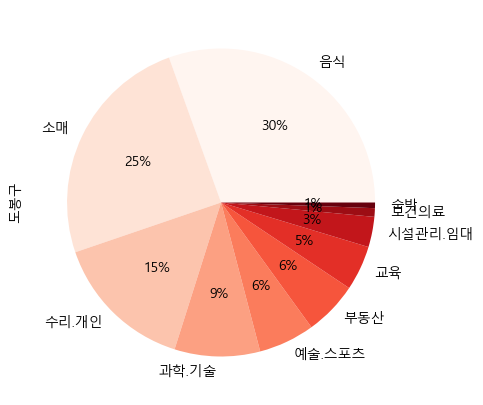

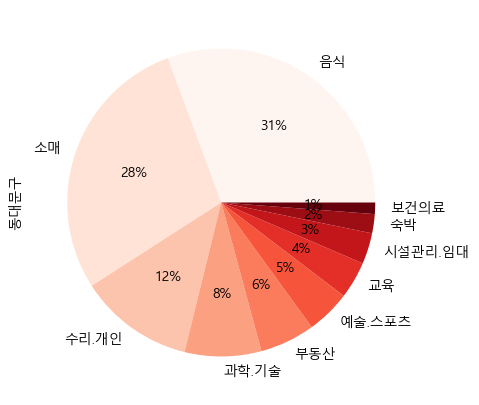

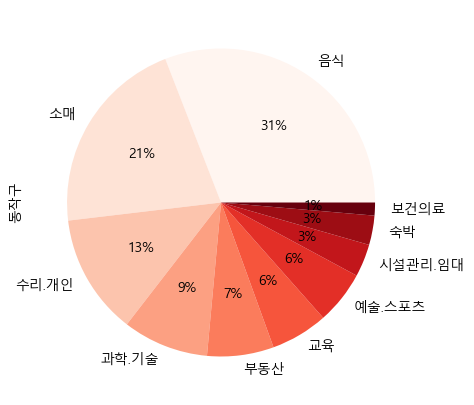

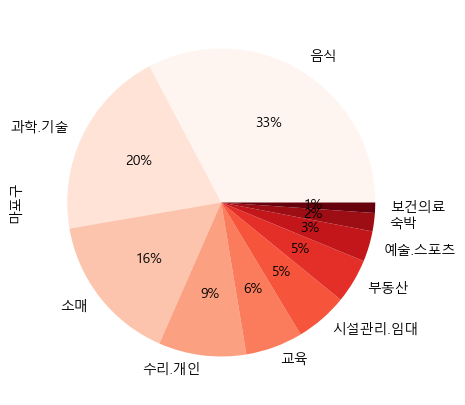

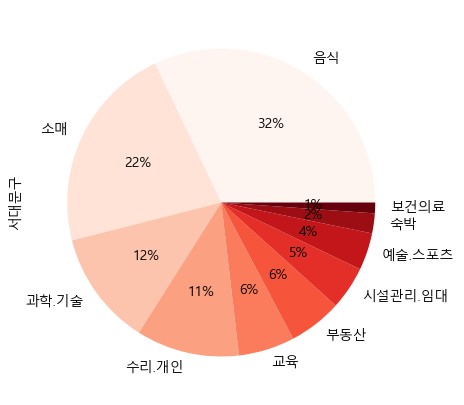

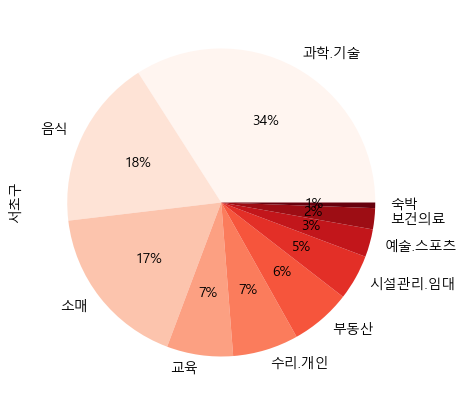

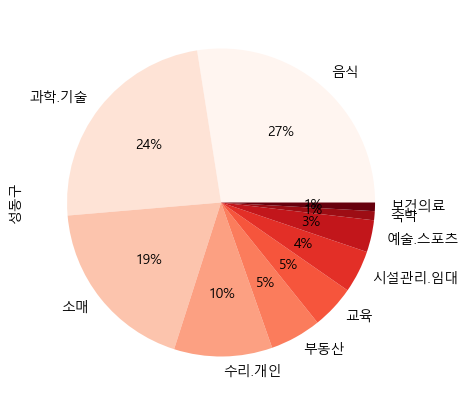

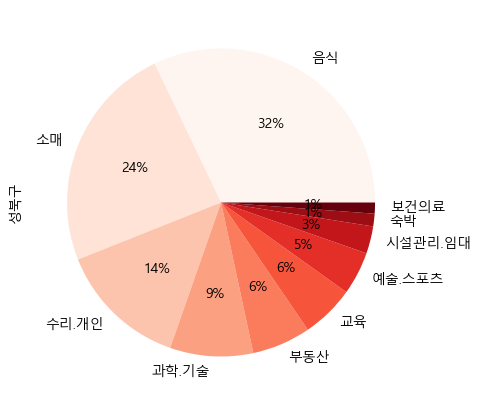

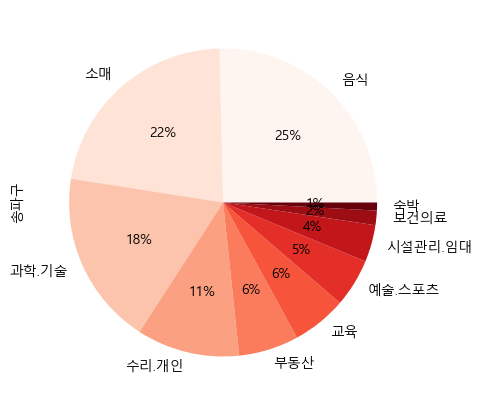

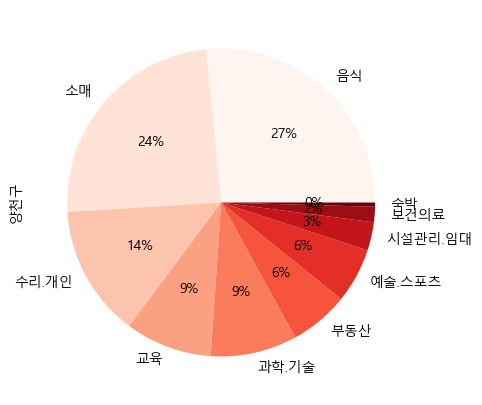

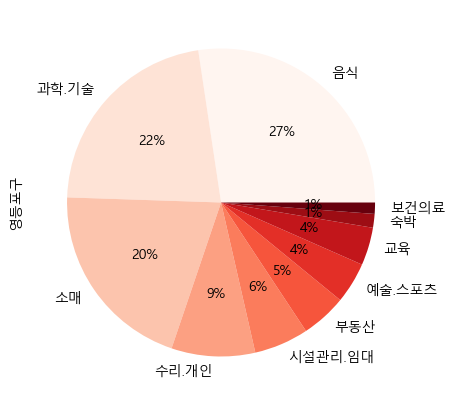

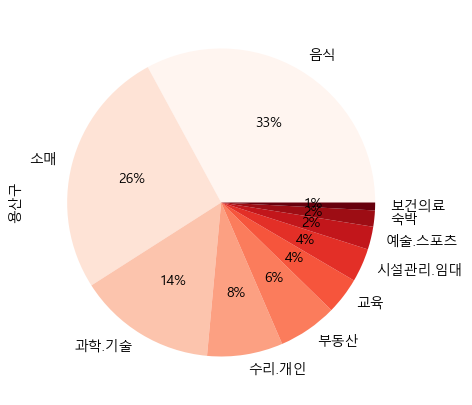

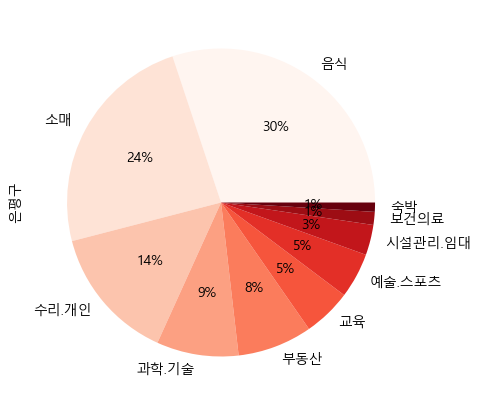

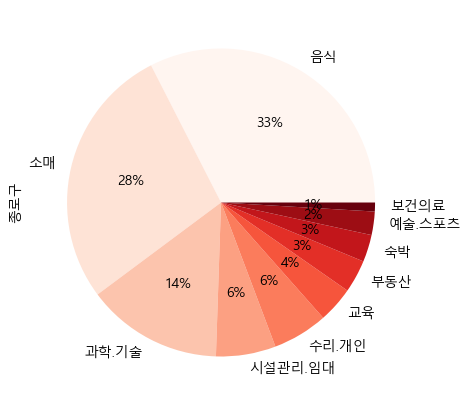

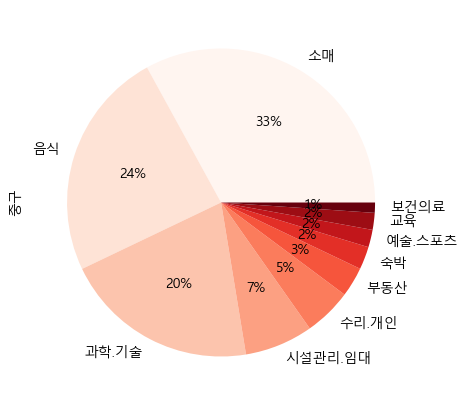

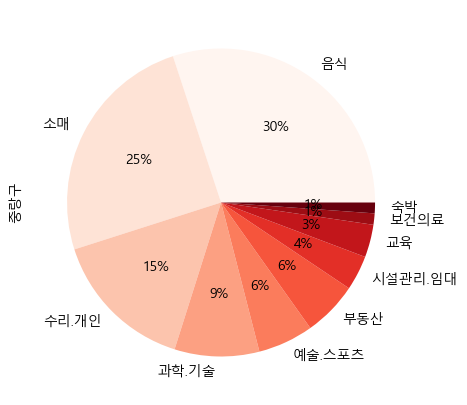

In [28]:
for x in g_gu_big.index:
    g_gu_big.T[x].sort_values(ascending=False).plot(kind='pie',
                        legend=False,   
                        autopct='%0.f%%',figsize=[5, 5],colormap='Reds',
                        textprops={'size': 10}
                       )
    plt.show()

- 인구가 가장 많은 송파구는 음식이 25%로 가장 많았고 소매가 22%로 두번째 과학.기술이 18%로 세번째를 차지했다. 그에 반면 숙박 및 보건의료는 각각 1~2%로 가장 낮은 비율을 차지하고 있다
- 인구가 가장 적은 중구는 소매업이 33%로 가장 많았고 음식이 24%로 두번째 과학.기술이 20%로 세번째를 차지했다. 그에 반면 보건의료 및 교육은 각각 1~2%로 가장 낮은 비율을 차지하고 있다.
<br><br>
- 상권수가 가장 많은 강남구는 과학.기술이 30%로 가장 많았고 음식이 21%로 두번째 소매가 16%로 세번째를 차지했다. 그에 반면 숙박이 1%로 가장 낮은 비율을 차지하고있다.
- 상권수가 가장 적은 도봉구는 음식이 30%로 가장 많았고 소매가 25%로 두번째 수리.개인이 15%로 세번째를 차지했다. 그에 반면 숙박이 1%로 가장 낮은 비율을 차지하고있다.
<br><br>
- 서울의 전체적인 상권 비율은 음식이 대부분의 지역에서 가장 높았고, 강남구,금천구,서초구만 음식보다  과학.기술이 가장 높았다. 또한 중구는 유일하게 소매가 가장 높았다.
- 서울의 대부분의 지역에서 숙박과 보건.의료의 비율이 가장 낮았다.

# 가설 3 서울의 음식점중 한식이 가장 많을 것이다.

In [29]:
# 상권업종대분류명 음식 추출하기
market_seoul[:3]

시도명 시군구명  행정동명        상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명        표준산업분류명
0  서울특별시  광진구  중곡3동     영자's곱창       음식       한식  곱창 전골/구이     한식 일반 음식점업
1  서울특별시   중구   광희동      호텔클로이       숙박    일반 숙박     여관/모텔            여관업
2  서울특별시  노원구  중계본동  나라차중계태권도장       교육    기타 교육  태권도/무술학원  태권도 및 무술 교육기관

In [30]:
seoul_food = market_seoul[market_seoul.상권업종대분류명=='음식']['상권업종중분류명'].value_counts().to_frame()
seoul_food

count
상권업종중분류명       
한식        44973
기타 간이     26263
비알코올      20709
주점        17928
일식         5831
서양식        5812
중식         5121
동남아시아      1490
구내식당·뷔페    1015

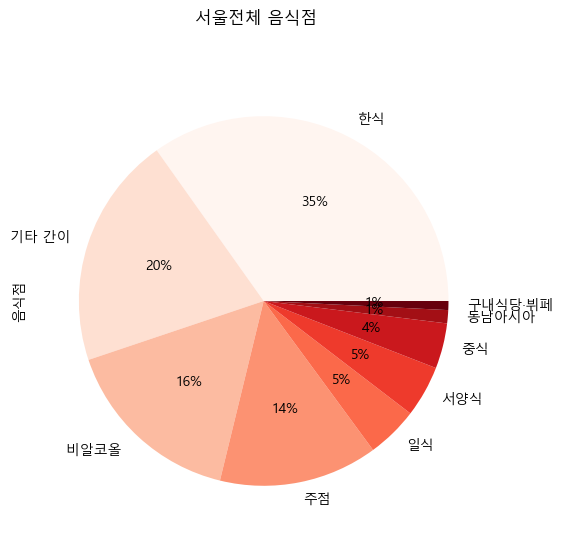

In [31]:
seoul_food.plot(kind='pie',
                legend=False,
                subplots=True,
               autopct='%0.f%%',
               figsize=[6, 6],
               colormap='Reds',
               title='서울전체 음식점',
                ylabel='음식점'
               )
plt.show()

In [32]:
# 각 지역(구) 별로 음식상권 분석
seoul_gu_food=market_seoul[market_seoul.상권업종대분류명=='음식'][['시군구명','상권업종중분류명']].groupby('시군구명').value_counts(normalize=True).unstack()
seoul_gu_food

상권업종중분류명   구내식당·뷔페     기타 간이     동남아시아     비알코올        서양식        일식   
시군구명                                                                   
강남구       0.011853  0.168801  0.015141  0.158938  0.083232  0.069130  \
강동구       0.008206  0.237530  0.007126  0.142302  0.027424  0.039516   
강북구       0.003211  0.211132  0.005084  0.131656  0.022478  0.028900   
강서구       0.008119  0.221201  0.008885  0.152420  0.031556  0.045343   
관악구       0.003430  0.213035  0.010110  0.137209  0.032677  0.040441   
광진구       0.004991  0.211686  0.007902  0.159285  0.035974  0.045540   
구로구       0.008365  0.218178  0.007913  0.124350  0.020122  0.033688   
금천구       0.018449  0.196310  0.010089  0.149611  0.013837  0.030845   
노원구       0.006518  0.255954  0.008774  0.150414  0.031336  0.039108   
도봉구       0.007291  0.244623  0.006562  0.132701  0.020416  0.034634   
동대문구      0.004854  0.201236  0.009488  0.150485  0.031774  0.033760   
동작구       0.004733  0.243875  0.010022  0.163697  0.025612  0.039532   
마포구       0.005477  0.176902  0.013751  0.217224  0.069689  0.065027   
서대문구      0.008091  0.230594  0.013654  0.161568  0.044501  0.043489   
서초구       0.012635  0.194347  0.012968  0.179052  0.055860  0.053367   
성동구       0.009097  0.193680  0.013407  0.185300  0.062246  0.045966   
성북구       0.007133  0.240451  0.010124  0.175794  0.037046  0.034745   
송파구       0.006635  0.221470  0.012872  0.168524  0.044188  0.049230   
양천구       0.005548  0.267406  0.008599  0.151179  0.024133  0.040777   
영등포구      0.009936  0.167154  0.009936  0.145821  0.027762  0.044857   
용산구       0.011529  0.174851  0.021349  0.162041  0.126601  0.050811   
은평구       0.004070  0.228126  0.008139  0.143116  0.026679  0.034592   
종로구       0.007292  0.148823  0.016573  0.189924  0.056845  0.041598   
중구        0.010017  0.158041  0.018549  0.172695  0.045817  0.040252   
중랑구       0.003499  0.211697  0.006748  0.124219  0.020745  0.030492   

상권업종중분류명        주점        중식        한식  
시군구명                                    
강남구       0.116889  0.035041  0.340976  
강동구       0.146405  0.033902  0.357590  
강북구       0.172063  0.034252  0.391223  
강서구       0.151808  0.038603  0.342065  
관악구       0.177288  0.039177  0.346633  
광진구       0.148056  0.046787  0.339780  
구로구       0.150803  0.073706  0.362876  
금천구       0.144999  0.055924  0.379937  
노원구       0.118075  0.036601  0.353221  
도봉구       0.133795  0.028801  0.391178  
동대문구      0.126655  0.043469  0.398279  
동작구       0.133909  0.041203  0.337416  
마포구       0.149749  0.033563  0.268617  
서대문구      0.129204  0.042478  0.326422  
서초구       0.106234  0.037240  0.348296  
성동구       0.111563  0.031841  0.346900  
성북구       0.117579  0.034054  0.343074  
송파구       0.121417  0.032909  0.342755  
양천구       0.133981  0.035784  0.332594  
영등포구      0.150205  0.076563  0.367767  
용산구       0.146456  0.029035  0.277327  
은평구       0.159394  0.032557  0.363328  
종로구       0.150481  0.029997  0.358469  
중구        0.127064  0.039696  0.387869  
중랑구       0.171457  0.027493  0.403649

In [33]:
seoul_gu_food.columns

Index(['구내식당·뷔페', '기타 간이', '동남아시아', '비알코올 ', '서양식', '일식', '주점', '중식', '한식'], dtype='object', name='상권업종중분류명')

In [34]:
# 특수기호가 있는 컬럼명 수정
seoul_gu_food.rename(columns={'구내식당·뷔페': '구내식당.뷔페'},inplace=True)
seoul_gu_food

상권업종중분류명   구내식당.뷔페     기타 간이     동남아시아     비알코올        서양식        일식   
시군구명                                                                   
강남구       0.011853  0.168801  0.015141  0.158938  0.083232  0.069130  \
강동구       0.008206  0.237530  0.007126  0.142302  0.027424  0.039516   
강북구       0.003211  0.211132  0.005084  0.131656  0.022478  0.028900   
강서구       0.008119  0.221201  0.008885  0.152420  0.031556  0.045343   
관악구       0.003430  0.213035  0.010110  0.137209  0.032677  0.040441   
광진구       0.004991  0.211686  0.007902  0.159285  0.035974  0.045540   
구로구       0.008365  0.218178  0.007913  0.124350  0.020122  0.033688   
금천구       0.018449  0.196310  0.010089  0.149611  0.013837  0.030845   
노원구       0.006518  0.255954  0.008774  0.150414  0.031336  0.039108   
도봉구       0.007291  0.244623  0.006562  0.132701  0.020416  0.034634   
동대문구      0.004854  0.201236  0.009488  0.150485  0.031774  0.033760   
동작구       0.004733  0.243875  0.010022  0.163697  0.025612  0.039532   
마포구       0.005477  0.176902  0.013751  0.217224  0.069689  0.065027   
서대문구      0.008091  0.230594  0.013654  0.161568  0.044501  0.043489   
서초구       0.012635  0.194347  0.012968  0.179052  0.055860  0.053367   
성동구       0.009097  0.193680  0.013407  0.185300  0.062246  0.045966   
성북구       0.007133  0.240451  0.010124  0.175794  0.037046  0.034745   
송파구       0.006635  0.221470  0.012872  0.168524  0.044188  0.049230   
양천구       0.005548  0.267406  0.008599  0.151179  0.024133  0.040777   
영등포구      0.009936  0.167154  0.009936  0.145821  0.027762  0.044857   
용산구       0.011529  0.174851  0.021349  0.162041  0.126601  0.050811   
은평구       0.004070  0.228126  0.008139  0.143116  0.026679  0.034592   
종로구       0.007292  0.148823  0.016573  0.189924  0.056845  0.041598   
중구        0.010017  0.158041  0.018549  0.172695  0.045817  0.040252   
중랑구       0.003499  0.211697  0.006748  0.124219  0.020745  0.030492   

상권업종중분류명        주점        중식        한식  
시군구명                                    
강남구       0.116889  0.035041  0.340976  
강동구       0.146405  0.033902  0.357590  
강북구       0.172063  0.034252  0.391223  
강서구       0.151808  0.038603  0.342065  
관악구       0.177288  0.039177  0.346633  
광진구       0.148056  0.046787  0.339780  
구로구       0.150803  0.073706  0.362876  
금천구       0.144999  0.055924  0.379937  
노원구       0.118075  0.036601  0.353221  
도봉구       0.133795  0.028801  0.391178  
동대문구      0.126655  0.043469  0.398279  
동작구       0.133909  0.041203  0.337416  
마포구       0.149749  0.033563  0.268617  
서대문구      0.129204  0.042478  0.326422  
서초구       0.106234  0.037240  0.348296  
성동구       0.111563  0.031841  0.346900  
성북구       0.117579  0.034054  0.343074  
송파구       0.121417  0.032909  0.342755  
양천구       0.133981  0.035784  0.332594  
영등포구      0.150205  0.076563  0.367767  
용산구       0.146456  0.029035  0.277327  
은평구       0.159394  0.032557  0.363328  
종로구       0.150481  0.029997  0.358469  
중구        0.127064  0.039696  0.387869  
중랑구       0.171457  0.027493  0.403649

In [35]:
seoul_gu_food.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='시군구명')

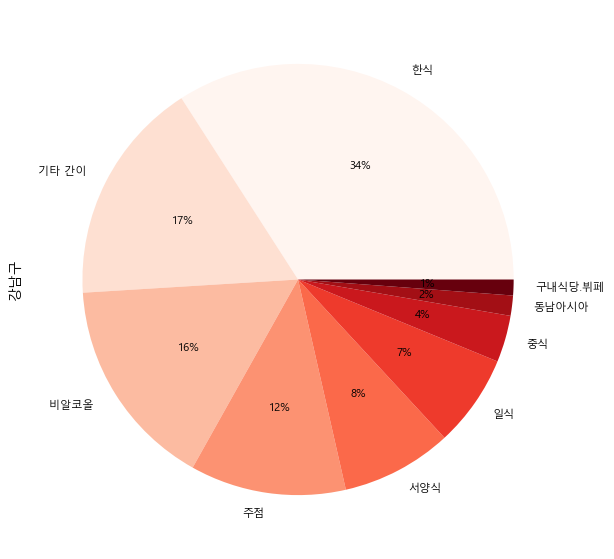

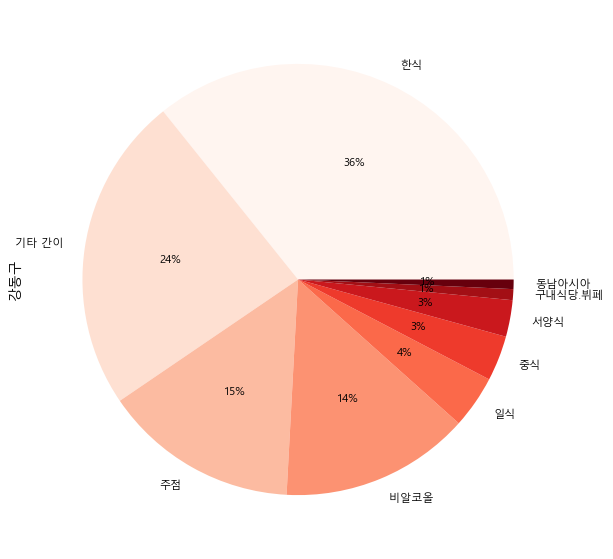

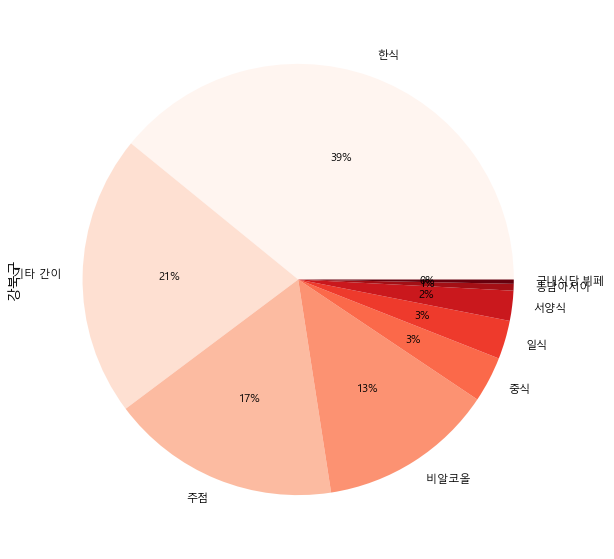

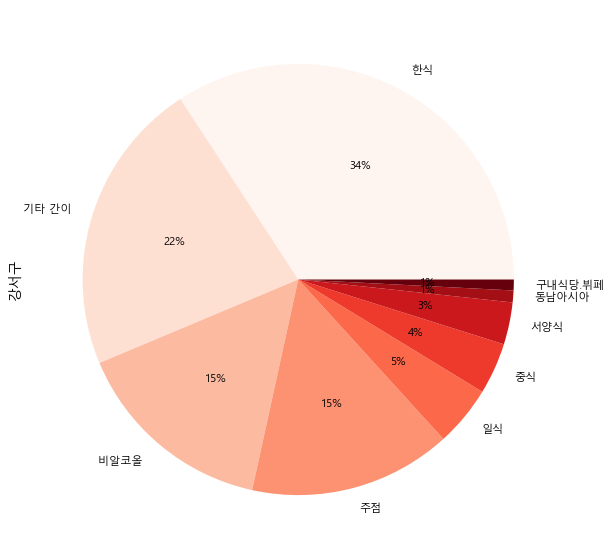

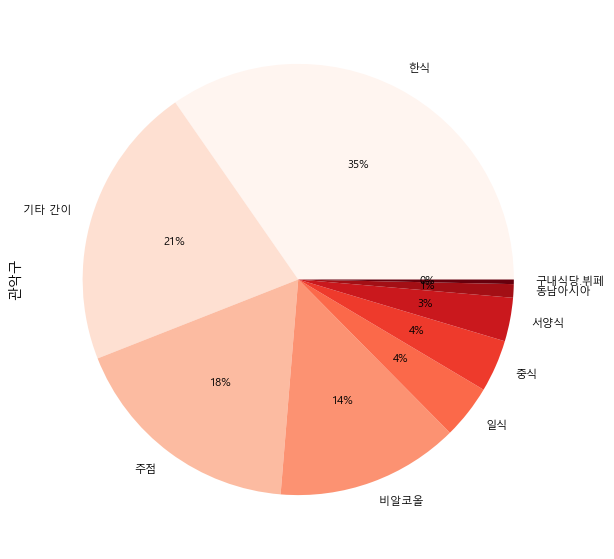

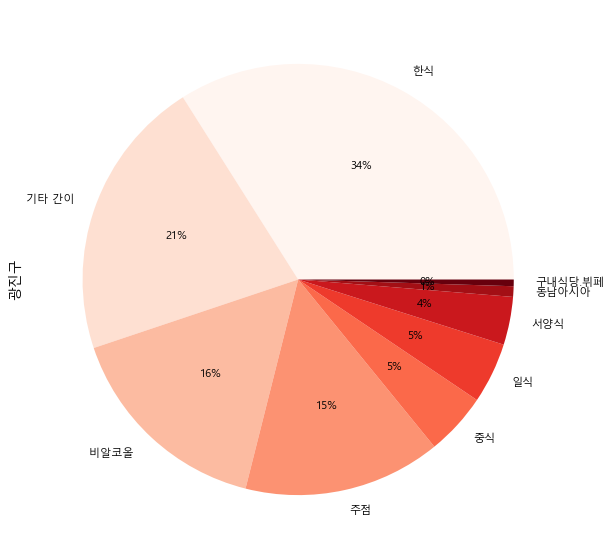

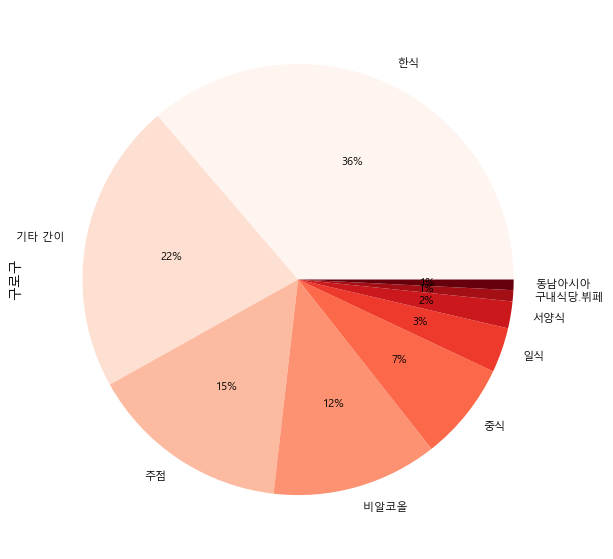

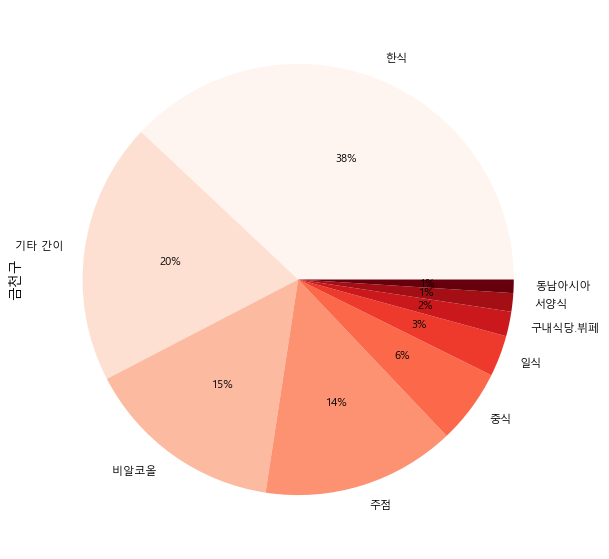

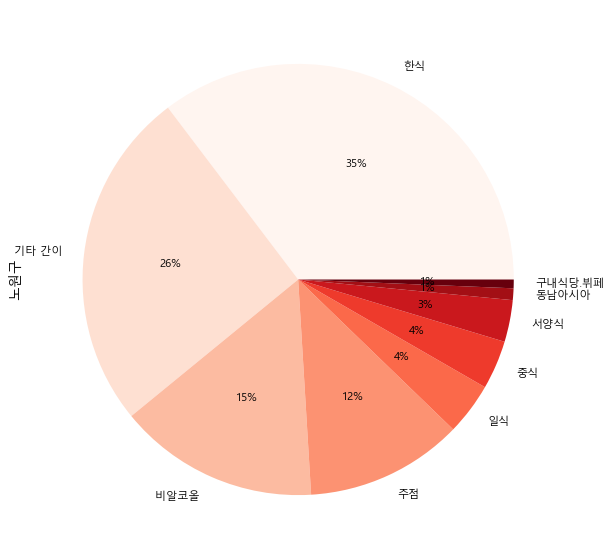

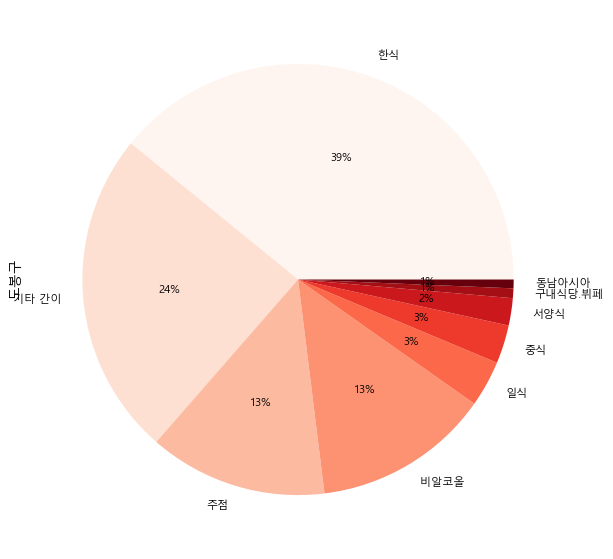

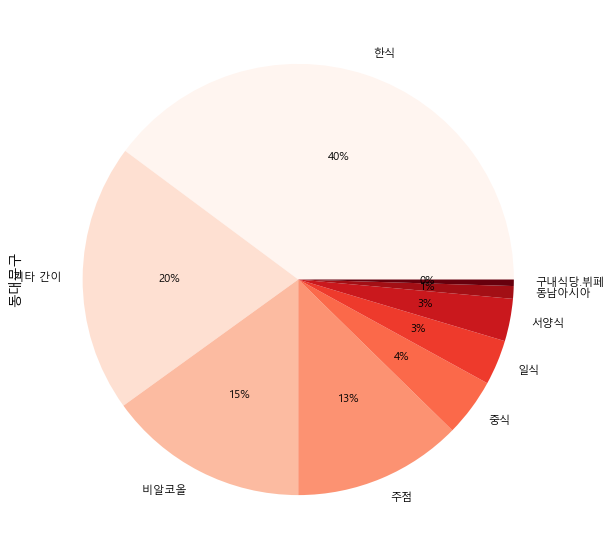

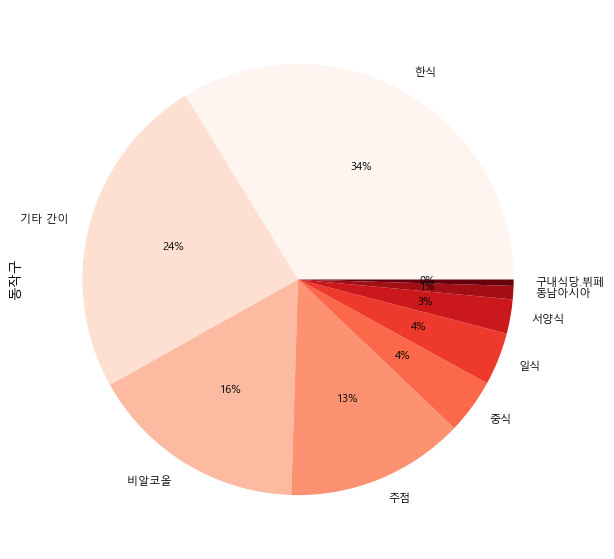

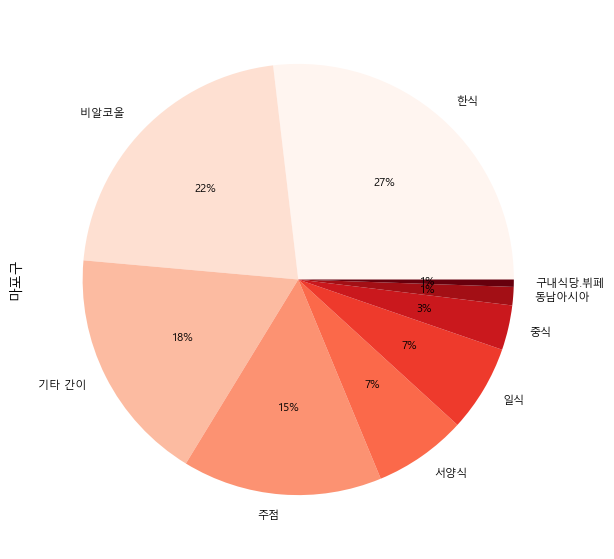

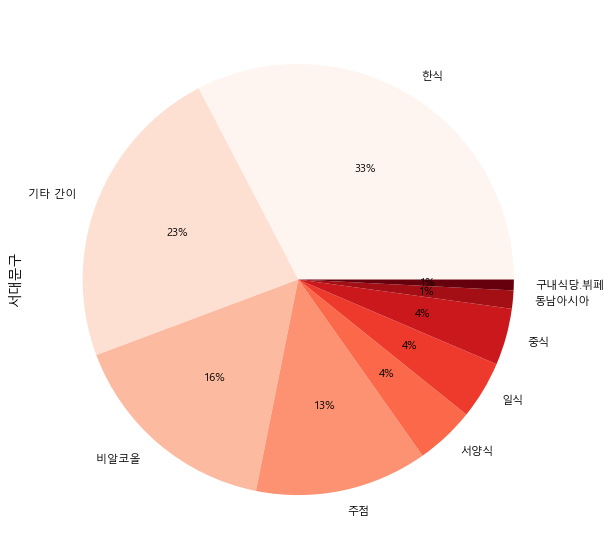

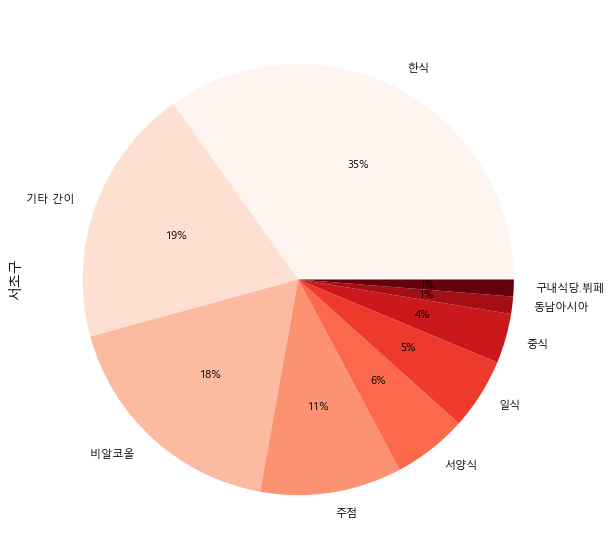

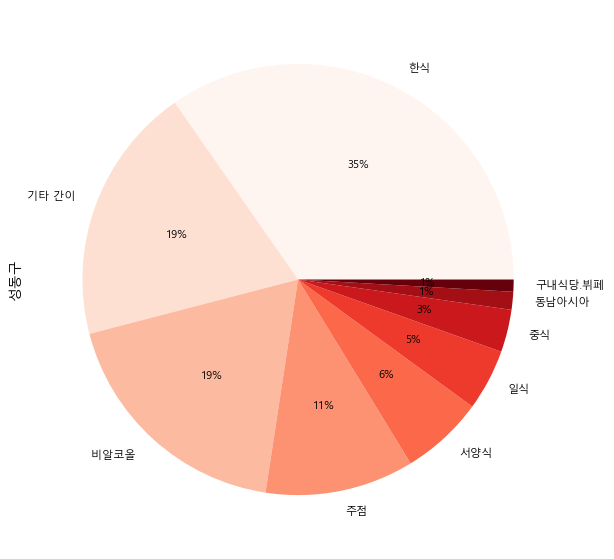

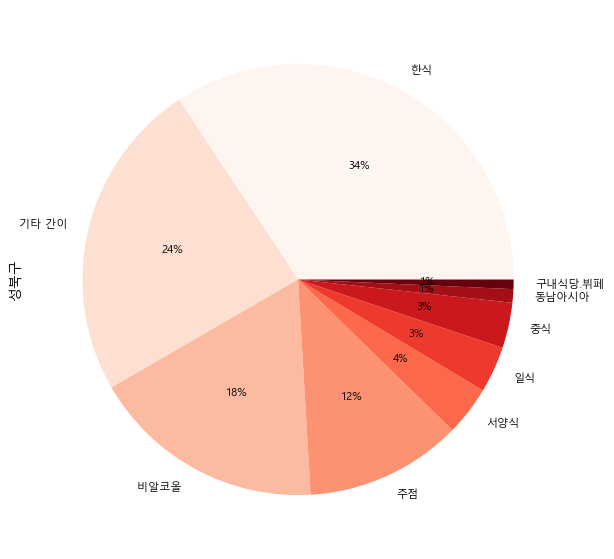

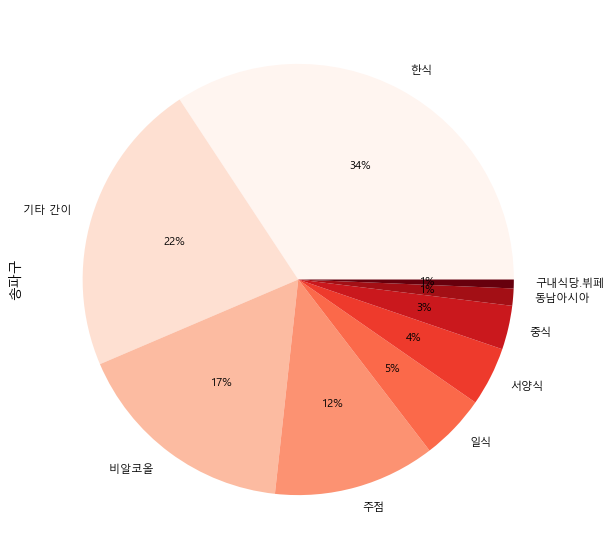

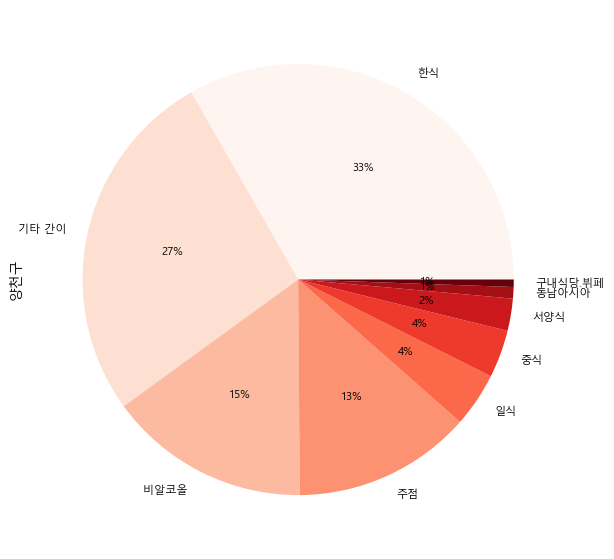

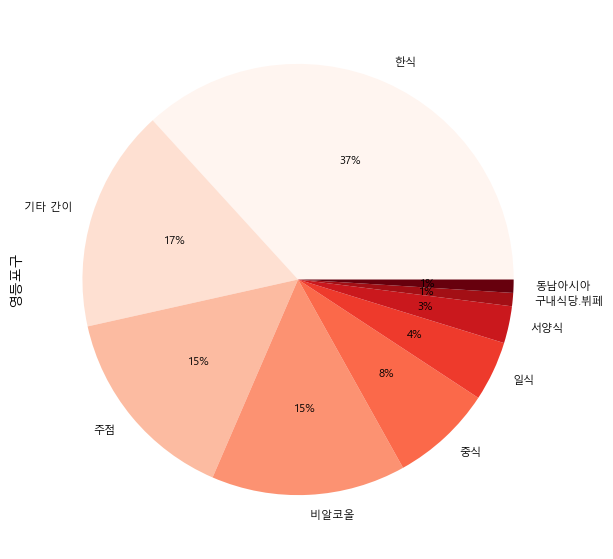

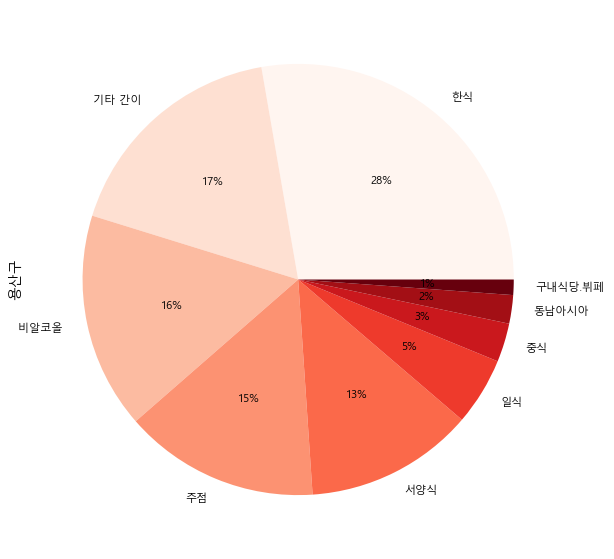

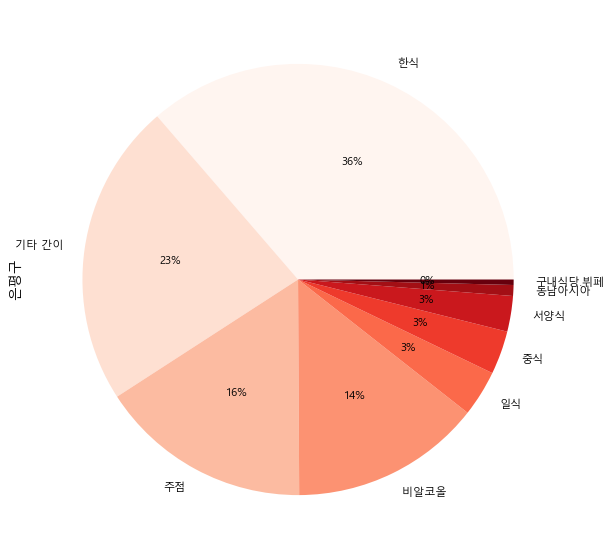

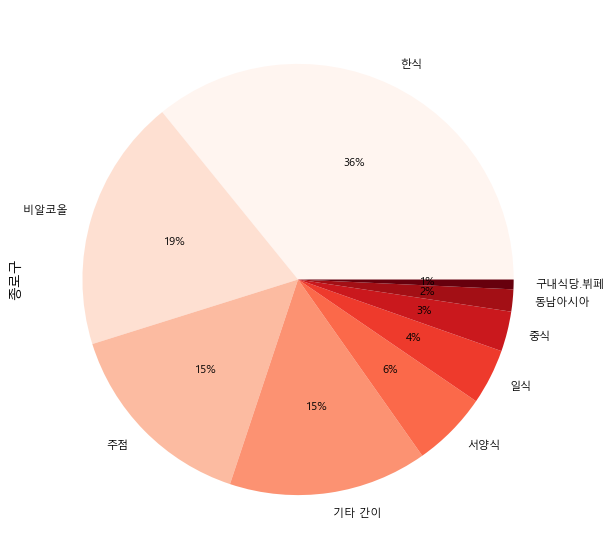

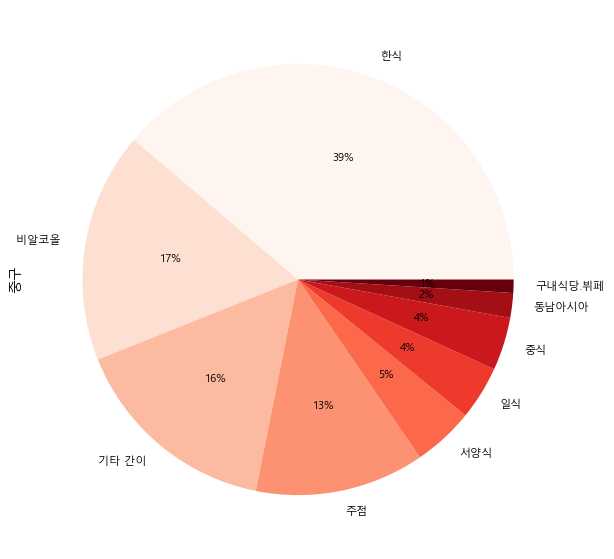

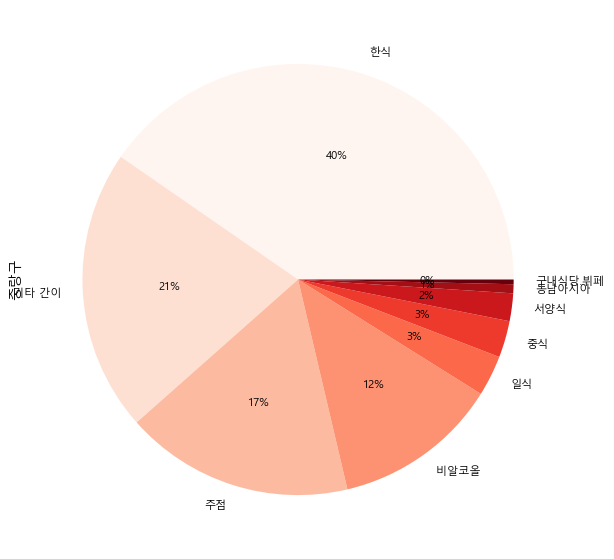

In [36]:
for x in seoul_gu_food.index:
    seoul_gu_food.T[x].sort_values(ascending=False).plot(kind='pie',
                        legend=False,   
                        autopct='%0.f%%',figsize=[7, 7],colormap='Reds',
                        textprops={'size': 8}
                       )
    plt.show()

- 서울 모든 지역에서 한식이 가장 많은 비율을 차지했고 기타 간이, 주점, 비알코올이 나머지 대부분의 비율을 차지했다.

# 서울 각 지역별 상권이 많은 곳이 번화가, 상업지구일 것이다.

In [37]:
# 필요한 작업 행정동명 인원수 구하기
# human_seoul 파일 전처리 다시하기

In [133]:
# 전처리 완료한 human_seoul파일
human_seoul_detail=pd.read_csv('human_seoul_detail.csv')
human_seoul_detail

시군구명   읍면동명      계
0    종로구  청운효자동  11531
1    종로구    사직동   9104
2    종로구    삼청동   2301
3    종로구    부암동   9168
4    종로구    평창동  17520
..   ...    ...    ...
421  강동구  성내제2동  22816
422  강동구  성내제3동  22624
423  강동구     길동  44809
424  강동구  둔촌제1동     64
425  강동구  둔촌제2동  24096

[426 rows x 3 columns]

In [134]:
# human_seoul_detail 읍면동명-> 행정동명 변경 
# 계 -> 인구수 변경
human_seoul_detail.rename(columns={'읍면동명': '행정동명', '계': '인구수'},inplace=True)
human_seoul_detail

시군구명   행정동명    인구수
0    종로구  청운효자동  11531
1    종로구    사직동   9104
2    종로구    삼청동   2301
3    종로구    부암동   9168
4    종로구    평창동  17520
..   ...    ...    ...
421  강동구  성내제2동  22816
422  강동구  성내제3동  22624
423  강동구     길동  44809
424  강동구  둔촌제1동     64
425  강동구  둔촌제2동  24096

[426 rows x 3 columns]

In [135]:
human_seoul_detail

시군구명   행정동명    인구수
0    종로구  청운효자동  11531
1    종로구    사직동   9104
2    종로구    삼청동   2301
3    종로구    부암동   9168
4    종로구    평창동  17520
..   ...    ...    ...
421  강동구  성내제2동  22816
422  강동구  성내제3동  22624
423  강동구     길동  44809
424  강동구  둔촌제1동     64
425  강동구  둔촌제2동  24096

[426 rows x 3 columns]

In [162]:
def remove_character(string):
    if string.startswith('홍제제'):
        # '홍제'로 시작하는 경우에는 '제' 삭제하지 않음
        return string.replace('홍제제','홍제')
    elif string.startswith('제기'):
        # '제기'로 시작하는 경우에는 '제' 삭제하지 않음
        return string
    else:
        # 그 외의 경우 '제' 삭제
        return string.replace('제', '')

# '동이름' 열에 적용하여 문자 삭제

In [163]:
human_seoul_detail.행정동명 = human_seoul_detail.행정동명.apply(remove_character)

In [164]:
hsd=human_seoul_detail.groupby('시군구명').value_counts().to_frame()
hsd

count
시군구명 행정동명   인구수         
강남구  개포1동   6890       1
     개포2동   36103      1
     청담동    25124      1
     일원본동   22842      1
     일원1동   14708      1
...                  ...
중랑구  면목3.8동 24698      1
     면목2동   23786      1
     망우본동   35576      1
     망우3동   15882      1
     중화2동   24315      1

[426 rows x 1 columns]

In [140]:
mks=market_seoul[['시군구명','행정동명','상권업종대분류명']]
mks

시군구명  행정동명 상권업종대분류명
0        광진구  중곡3동       음식
1         중구   광희동       숙박
2        노원구  중계본동       교육
3        양천구  신월5동    과학·기술
4        강서구  가양1동       음식
...      ...   ...      ...
474255   양천구  신월3동      부동산
474256   광진구   화양동    과학·기술
474257   강남구  논현2동       음식
474258  영등포구  양평2동    수리·개인
474259    중구  을지로동       소매

[474260 rows x 3 columns]

In [141]:
g_mks=mks.groupby('시군구명').value_counts().unstack()
g_mks

상권업종대분류명    과학·기술     교육   보건의료    부동산     소매  수리·개인    숙박  시설관리·임대  예술·스포츠   
시군구명 행정동명                                                                     
강남구  개포1동     8.0    3.0    1.0   24.0   26.0   17.0   NaN      2.0     1.0  \
     개포2동    63.0   61.0   21.0  155.0  111.0   63.0   4.0     17.0    28.0   
     개포3동    48.0   17.0    9.0   43.0   76.0   25.0   NaN     10.0    11.0   
     개포4동   427.0   73.0   15.0   72.0  267.0  138.0   6.0     87.0    53.0   
     논현1동  1571.0  177.0  246.0  250.0  680.0  365.0  39.0    276.0   132.0   
...           ...    ...    ...    ...    ...    ...   ...      ...     ...   
중랑구  상봉2동    70.0   35.0   23.0   81.0  259.0  150.0  47.0     45.0   116.0   
     신내1동   191.0   47.0    4.0   42.0  186.0  106.0   1.0     37.0    46.0   
     신내2동    41.0   41.0    8.0   27.0  116.0   78.0   NaN     16.0    17.0   
     중화1동    45.0   30.0    5.0   32.0  147.0   89.0   3.0     18.0     9.0   
     중화2동    90.0   15.0   11.0   43.0  272.0  152.0   8.0     37.0    78.0   

상권업종대분류명      음식  
시군구명 행정동명         
강남구  개포1동    9.0  
     개포2동  132.0  
     개포3동   65.0  
     개포4동  219.0  
     논현1동  849.0  
...          ...  
중랑구  상봉2동  512.0  
     신내1동  248.0  
     신내2동  125.0  
     중화1동   89.0  
     중화2동  351.0  

[426 rows x 10 columns]

In [142]:
g_mks=g_mks.fillna(0)
g_mks

상권업종대분류명    과학·기술     교육   보건의료    부동산     소매  수리·개인    숙박  시설관리·임대  예술·스포츠   
시군구명 행정동명                                                                     
강남구  개포1동     8.0    3.0    1.0   24.0   26.0   17.0   0.0      2.0     1.0  \
     개포2동    63.0   61.0   21.0  155.0  111.0   63.0   4.0     17.0    28.0   
     개포3동    48.0   17.0    9.0   43.0   76.0   25.0   0.0     10.0    11.0   
     개포4동   427.0   73.0   15.0   72.0  267.0  138.0   6.0     87.0    53.0   
     논현1동  1571.0  177.0  246.0  250.0  680.0  365.0  39.0    276.0   132.0   
...           ...    ...    ...    ...    ...    ...   ...      ...     ...   
중랑구  상봉2동    70.0   35.0   23.0   81.0  259.0  150.0  47.0     45.0   116.0   
     신내1동   191.0   47.0    4.0   42.0  186.0  106.0   1.0     37.0    46.0   
     신내2동    41.0   41.0    8.0   27.0  116.0   78.0   0.0     16.0    17.0   
     중화1동    45.0   30.0    5.0   32.0  147.0   89.0   3.0     18.0     9.0   
     중화2동    90.0   15.0   11.0   43.0  272.0  152.0   8.0     37.0    78.0   

상권업종대분류명      음식  
시군구명 행정동명         
강남구  개포1동    9.0  
     개포2동  132.0  
     개포3동   65.0  
     개포4동  219.0  
     논현1동  849.0  
...          ...  
중랑구  상봉2동  512.0  
     신내1동  248.0  
     신내2동  125.0  
     중화1동   89.0  
     중화2동  351.0  

[426 rows x 10 columns]

In [46]:
g_mks = g_mks.astype(int)
g_mks

상권업종대분류명   과학·기술   교육  보건의료  부동산   소매  수리·개인  숙박  시설관리·임대  예술·스포츠   음식
시군구명 행정동명                                                             
강남구  개포1동      8    3     1   24   26     17   0        2       1    9
     개포2동     63   61    21  155  111     63   4       17      28  132
     개포3동     48   17     9   43   76     25   0       10      11   65
     개포4동    427   73    15   72  267    138   6       87      53  219
     논현1동   1571  177   246  250  680    365  39      276     132  849
...          ...  ...   ...  ...  ...    ...  ..      ...     ...  ...
중랑구  상봉2동     70   35    23   81  259    150  47       45     116  512
     신내1동    191   47     4   42  186    106   1       37      46  248
     신내2동     41   41     8   27  116     78   0       16      17  125
     중화1동     45   30     5   32  147     89   3       18       9   89
     중화2동     90   15    11   43  272    152   8       37      78  351

[426 rows x 10 columns]

In [159]:
g_mks.loc['서대문구']

상권업종대분류명  과학·기술     교육  보건의료    부동산     소매  수리·개인     숙박  시설관리·임대  예술·스포츠   
행정동명                                                                        
남가좌1동      16.0   35.0   7.0   23.0  100.0   30.0    7.0     15.0    14.0  \
남가좌2동      69.0   48.0  11.0   55.0  192.0  121.0   11.0     24.0    44.0   
북가좌1동      27.0   23.0   8.0   27.0   59.0   46.0    2.0      7.0     9.0   
북가좌2동      81.0   67.0   7.0   74.0  205.0  141.0   12.0     28.0    40.0   
북아현동       39.0   25.0   4.0   58.0  150.0   66.0    9.0     31.0    16.0   
신촌동       461.0  180.0  42.0  111.0  726.0  288.0  138.0    176.0   131.0   
연희동       354.0  102.0  11.0   75.0  355.0  138.0   31.0     76.0    44.0   
천연동        27.0   27.0   4.0   32.0  113.0   62.0    8.0     14.0    13.0   
충현동       169.0   39.0   9.0   65.0  153.0   65.0   14.0     97.0    33.0   
홍은1동       42.0   28.0   2.0   40.0  113.0   94.0    3.0     17.0    17.0   
홍은2동       62.0   47.0   8.0   29.0  132.0   73.0    7.0     29.0    42.0   
홍제1동       55.0   40.0  10.0   35.0  130.0   86.0    6.0     17.0    30.0   
홍제2동       37.0   18.0   7.0   33.0   75.0   42.0    1.0     12.0    24.0   
홍제3동       48.0   48.0   9.0   34.0  196.0   82.0    9.0     16.0    25.0   

상권업종대분류명      음식  
행정동명              
남가좌1동      124.0  
남가좌2동      308.0  
북가좌1동       69.0  
북가좌2동      265.0  
북아현동       113.0  
신촌동       1148.0  
연희동        471.0  
천연동        171.0  
충현동        408.0  
홍은1동       153.0  
홍은2동       208.0  
홍제1동       188.0  
홍제2동        89.0  
홍제3동       240.0

In [165]:
hsd.loc['서대문구']

count
행정동명  인구수         
홍제3동  17739      1
홍제2동  13254      1
홍제1동  24850      1
홍은2동  28738      1
홍은1동  22427      1
충현동   19816      1
천연동   16713      1
연희동   34320      1
신촌동   20409      1
북아현동  15544      1
북가좌2동 30816      1
북가좌1동 17749      1
남가좌2동 29252      1
남가좌1동 16711      1

In [143]:
# 두개의 csv 데이터의 행정동명이 일치하지 않는 데이터가 있음 
# human_seoul.csv 파일의 행정동명에 '제'가 들어감 '제'를 제거해야함

In [166]:
g_mks_hsd = g_mks.join(hsd)
g_mks_hsd

과학·기술     교육   보건의료    부동산     소매  수리·개인    숙박  시설관리·임대   
시군구명 행정동명 인구수                                                               
강남구  개포1동 6890      8.0    3.0    1.0   24.0   26.0   17.0   0.0      2.0  \
     개포2동 36103    63.0   61.0   21.0  155.0  111.0   63.0   4.0     17.0   
     개포3동 17109    48.0   17.0    9.0   43.0   76.0   25.0   0.0     10.0   
     개포4동 23457   427.0   73.0   15.0   72.0  267.0  138.0   6.0     87.0   
     논현1동 21371  1571.0  177.0  246.0  250.0  680.0  365.0  39.0    276.0   
...                 ...    ...    ...    ...    ...    ...   ...      ...   
중랑구  상봉2동 20215    70.0   35.0   23.0   81.0  259.0  150.0  47.0     45.0   
     신내1동 38332   191.0   47.0    4.0   42.0  186.0  106.0   1.0     37.0   
     신내2동 19891    41.0   41.0    8.0   27.0  116.0   78.0   0.0     16.0   
     중화1동 19037    45.0   30.0    5.0   32.0  147.0   89.0   3.0     18.0   
     중화2동 24315    90.0   15.0   11.0   43.0  272.0  152.0   8.0     37.0   

                 예술·스포츠     음식  count  
시군구명 행정동명 인구수                          
강남구  개포1동 6890      1.0    9.0      1  
     개포2동 36103    28.0  132.0      1  
     개포3동 17109    11.0   65.0      1  
     개포4동 23457    53.0  219.0      1  
     논현1동 21371   132.0  849.0      1  
...                 ...    ...    ...  
중랑구  상봉2동 20215   116.0  512.0      1  
     신내1동 38332    46.0  248.0      1  
     신내2동 19891    17.0  125.0      1  
     중화1동 19037     9.0   89.0      1  
     중화2동 24315    78.0  351.0      1  

[426 rows x 11 columns]

In [145]:
g_mks_hsd.columns

Index(['과학·기술', '교육', '보건의료', '부동산', '소매', '수리·개인', '숙박', '시설관리·임대', '예술·스포츠',
       '음식', 'count'],
      dtype='object')

In [146]:
# count 삭제

In [147]:
g_mks_hsd.drop(columns=['count'],inplace=True)

In [148]:
g_mks_hsd

과학·기술     교육   보건의료    부동산     소매  수리·개인    숙박  시설관리·임대   
시군구명 행정동명 인구수                                                               
강남구  개포1동 6890      8.0    3.0    1.0   24.0   26.0   17.0   0.0      2.0  \
     개포2동 36103    63.0   61.0   21.0  155.0  111.0   63.0   4.0     17.0   
     개포3동 17109    48.0   17.0    9.0   43.0   76.0   25.0   0.0     10.0   
     개포4동 23457   427.0   73.0   15.0   72.0  267.0  138.0   6.0     87.0   
     논현1동 21371  1571.0  177.0  246.0  250.0  680.0  365.0  39.0    276.0   
...                 ...    ...    ...    ...    ...    ...   ...      ...   
중랑구  상봉2동 20215    70.0   35.0   23.0   81.0  259.0  150.0  47.0     45.0   
     신내1동 38332   191.0   47.0    4.0   42.0  186.0  106.0   1.0     37.0   
     신내2동 19891    41.0   41.0    8.0   27.0  116.0   78.0   0.0     16.0   
     중화1동 19037    45.0   30.0    5.0   32.0  147.0   89.0   3.0     18.0   
     중화2동 24315    90.0   15.0   11.0   43.0  272.0  152.0   8.0     37.0   

                 예술·스포츠     음식  
시군구명 행정동명 인구수                   
강남구  개포1동 6890      1.0    9.0  
     개포2동 36103    28.0  132.0  
     개포3동 17109    11.0   65.0  
     개포4동 23457    53.0  219.0  
     논현1동 21371   132.0  849.0  
...                 ...    ...  
중랑구  상봉2동 20215   116.0  512.0  
     신내1동 38332    46.0  248.0  
     신내2동 19891    17.0  125.0  
     중화1동 19037     9.0   89.0  
     중화2동 24315    78.0  351.0  

[426 rows x 10 columns]

In [158]:
g_mks_hsd.loc['동대문구']

과학·기술    교육  보건의료    부동산     소매  수리·개인    숙박  시설관리·임대  예술·스포츠   
행정동명  인구수                                                                    
답십리1동 28067   55.0  58.0  15.0   58.0  207.0  104.0  13.0     38.0    44.0  \
답십리2동 27699   72.0  25.0  15.0   61.0  273.0  129.0   4.0     21.0    52.0   
용신동   35393  267.0  72.0  24.0  145.0  632.0  201.0  52.0    101.0    78.0   
이문1동  17968   61.0  38.0   7.0   55.0  156.0   94.0  22.0     24.0    44.0   
이문2동  19573   31.0  25.0   3.0   36.0   80.0   53.0   6.0      9.0    12.0   
장안1동  37893  206.0  44.0  16.0  103.0  491.0  319.0  22.0     74.0    93.0   
장안2동  32449   83.0  88.0  18.0   64.0  353.0  195.0  19.0     30.0    99.0   
전농1동  28734   74.0  44.0  12.0   89.0  524.0  165.0  28.0     38.0    62.0   
전농2동  18121   24.0  27.0   3.0   17.0   94.0   63.0   1.0      9.0    25.0   
제기동   24104   91.0  52.0  30.0   74.0  755.0  141.0  44.0     43.0    35.0   
청량리동  18739  105.0  24.0  17.0   48.0  257.0  119.0  28.0     26.0    41.0   
회기동   10496   50.0  30.0   5.0   27.0  162.0   72.0  28.0     22.0    46.0   
휘경1동  13963   30.0  22.0   9.0   41.0  125.0   68.0  27.0     28.0    31.0   
휘경2동  24493   39.0  27.0   4.0   39.0   97.0   62.0   3.0     18.0    24.0   

                음식  
행정동명  인구수           
답십리1동 28067  216.0  
답십리2동 27699  219.0  
용신동   35393  591.0  
이문1동  17968  322.0  
이문2동  19573   95.0  
장안1동  37893  578.0  
장안2동  32449  494.0  
전농1동  28734  386.0  
전농2동  18121  128.0  
제기동   24104  486.0  
청량리동  18739  275.0  
회기동   10496  429.0  
휘경1동  13963  173.0  
휘경2동  24493  140.0

In [150]:
g_mks_hsd.loc['강남구'].sort_values(by='인구수',ascending=False).sum(axis=1).to_frame().T.unstack().reset_index().rename(columns={0 : '상권수'}).drop(columns=['level_2'])

행정동명    인구수      상권수
0    세곡동  43954    956.0
1   역삼2동  36935   3225.0
2   대치2동  36841   2832.0
3   개포2동  36103    655.0
4   역삼1동  34302  11944.0
5   도곡2동  32619   1014.0
6   삼성2동  30624   3135.0
7   압구정동  25633   3698.0
8    청담동  25124   4135.0
9   대치1동  23721    705.0
10  개포4동  23457   1357.0
11  일원본동  22842    262.0
12  논현1동  21371   4585.0
13  도곡1동  20705   1065.0
14  논현2동  20676   4685.0
15  대치4동  18881   2997.0
16  개포3동  17109    304.0
17   신사동  15551   3893.0
18  일원1동  14708    621.0
19   수서동  14175    790.0
20  삼성1동  12425   3004.0
21  개포1동   6890     91.0

<Axes: xlabel='행정동명'>

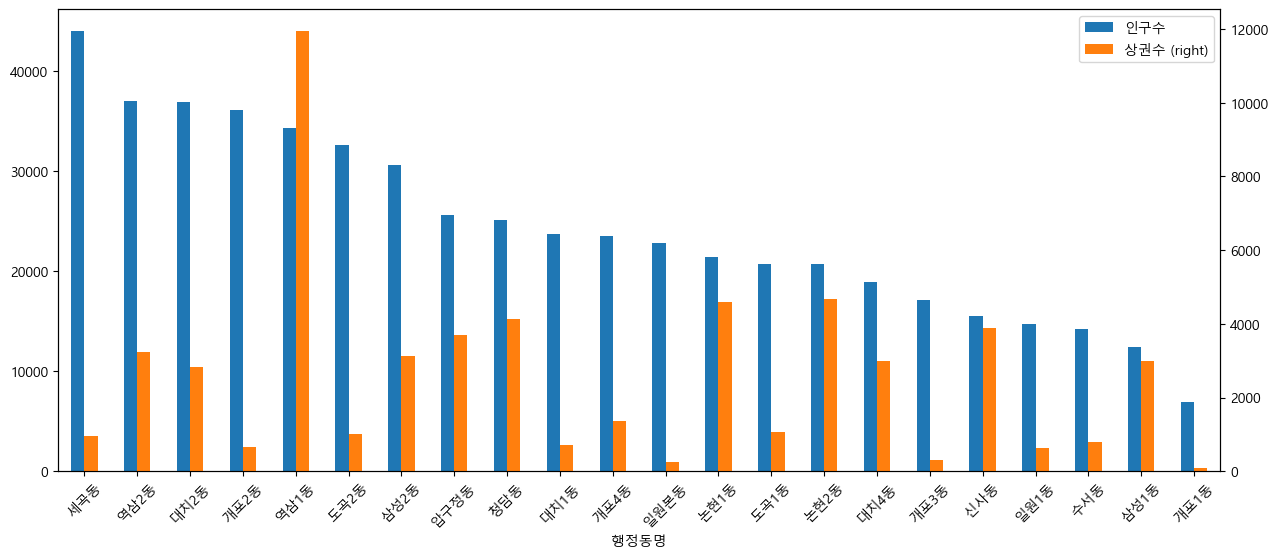

In [151]:
g_mks_hsd.loc['강남구'].sort_values(by='인구수',ascending=False).sum(axis=1).to_frame().T.unstack().reset_index().rename(columns={0 : '상권수'}).drop(columns=['level_2']).plot(kind='bar',x='행정동명',secondary_y='상권수', rot=45, figsize=(15,6))

In [152]:
seoul_gu = market_seoul.시군구명.unique()
seoul_gu

array(['광진구', '중구', '노원구', '양천구', '강서구', '강북구', '송파구', '구로구', '강남구',
       '영등포구', '금천구', '마포구', '동작구', '은평구', '성동구', '동대문구', '중랑구', '성북구',
       '서초구', '서대문구', '도봉구', '종로구', '관악구', '강동구', '용산구'], dtype=object)

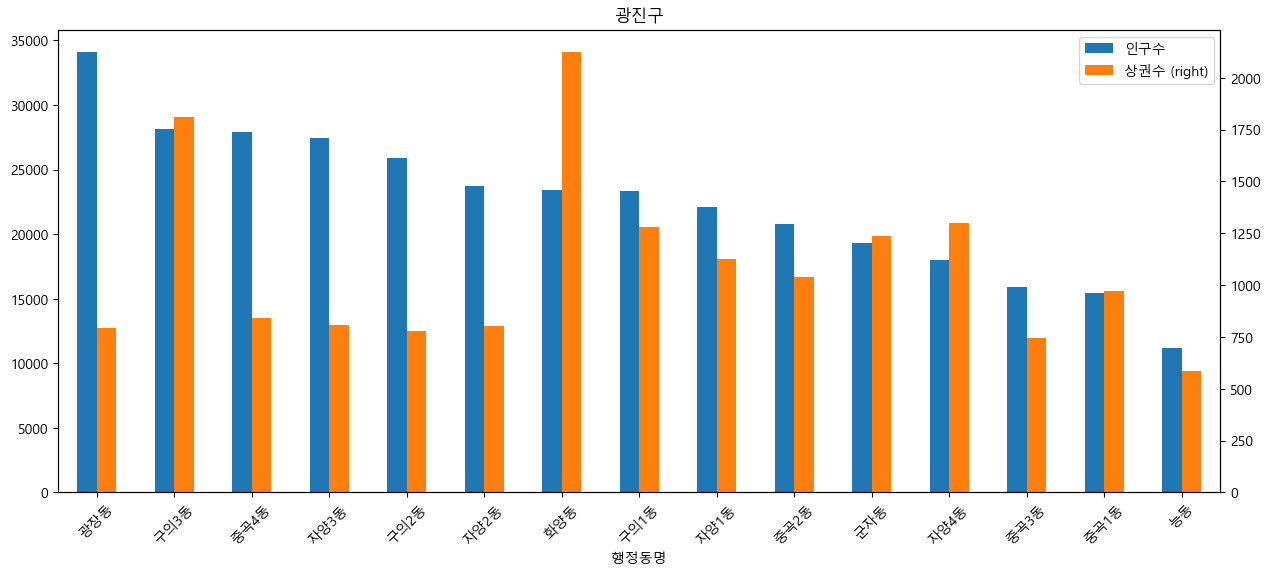

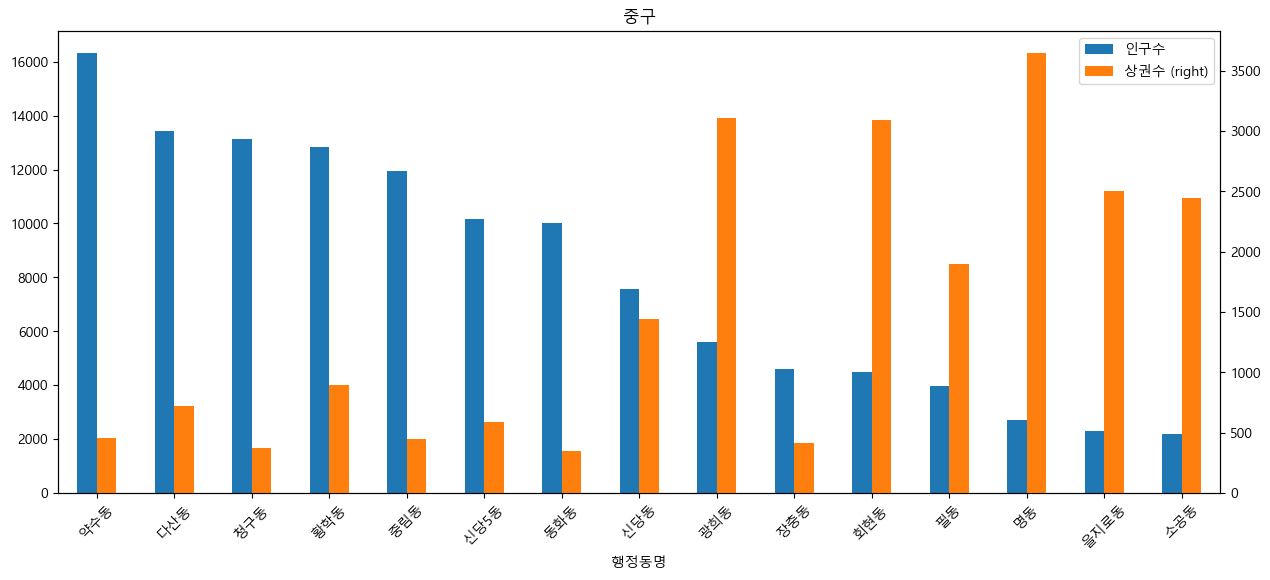

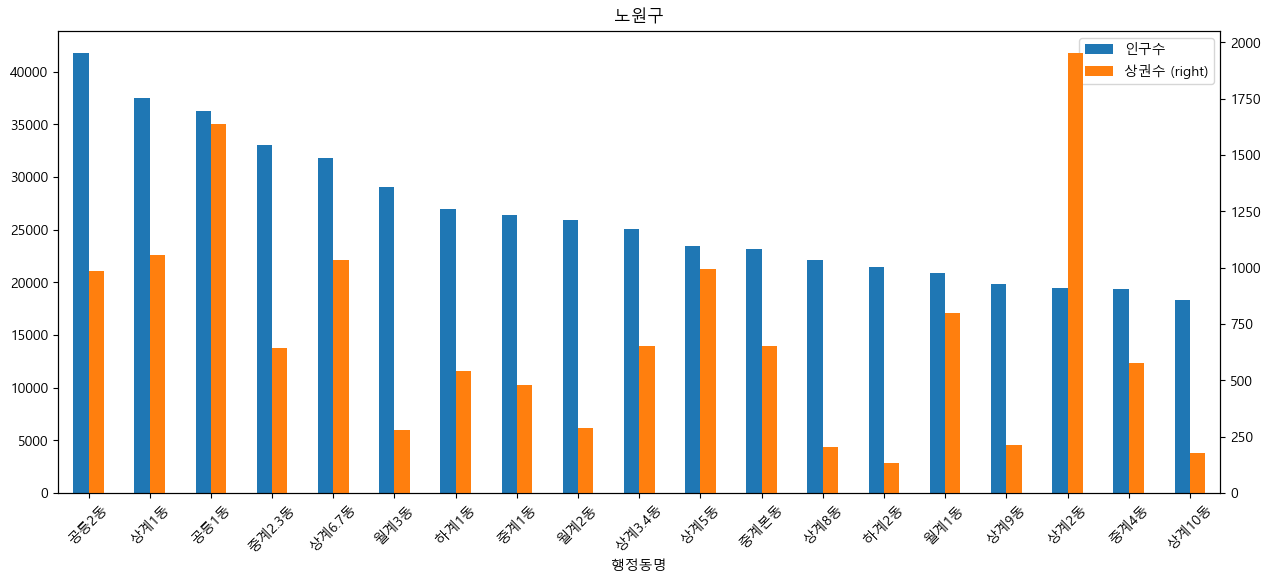

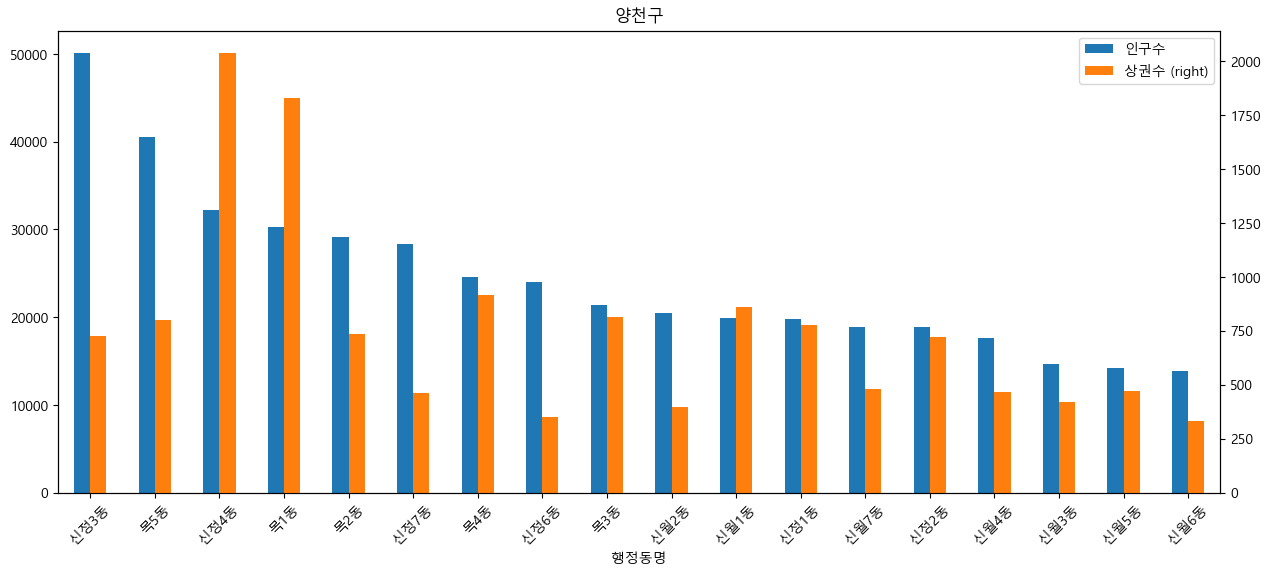

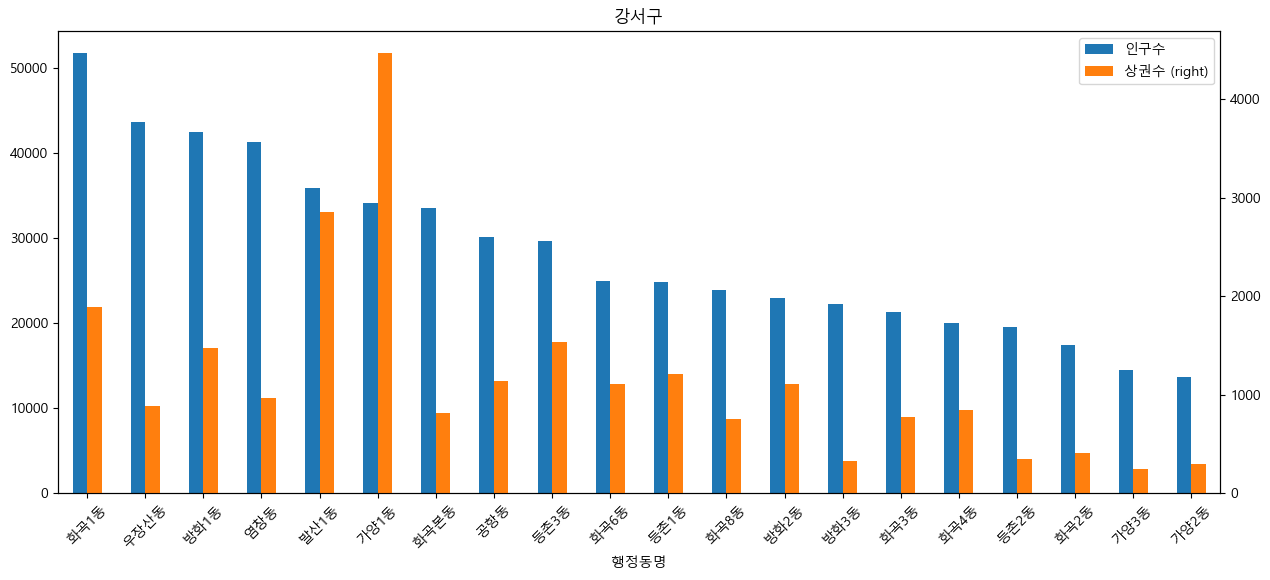

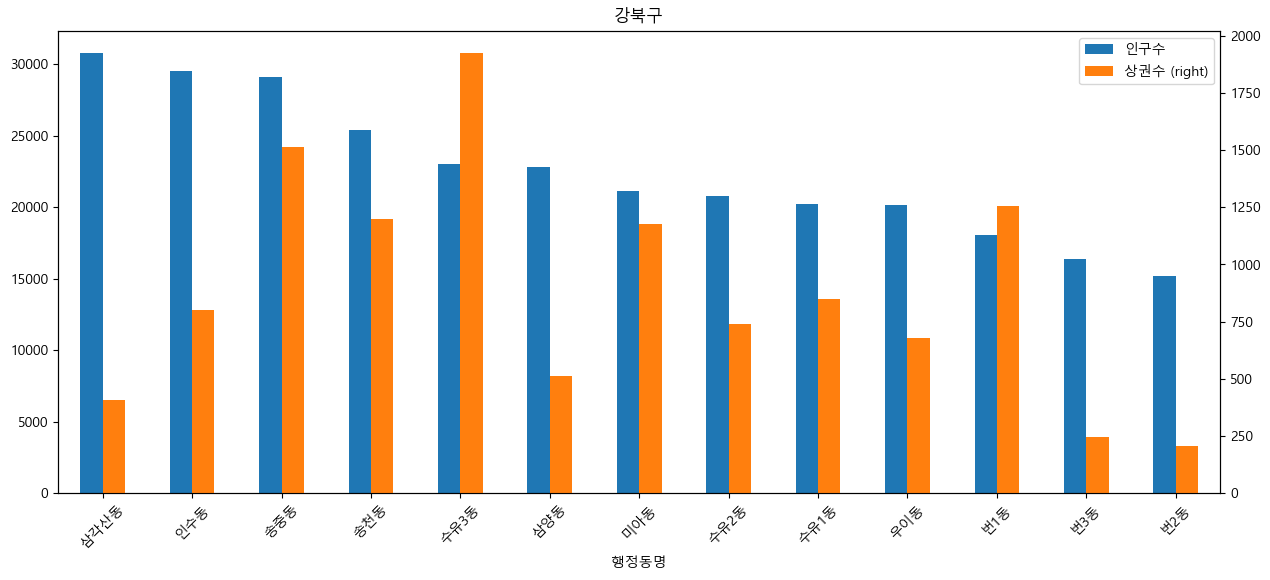

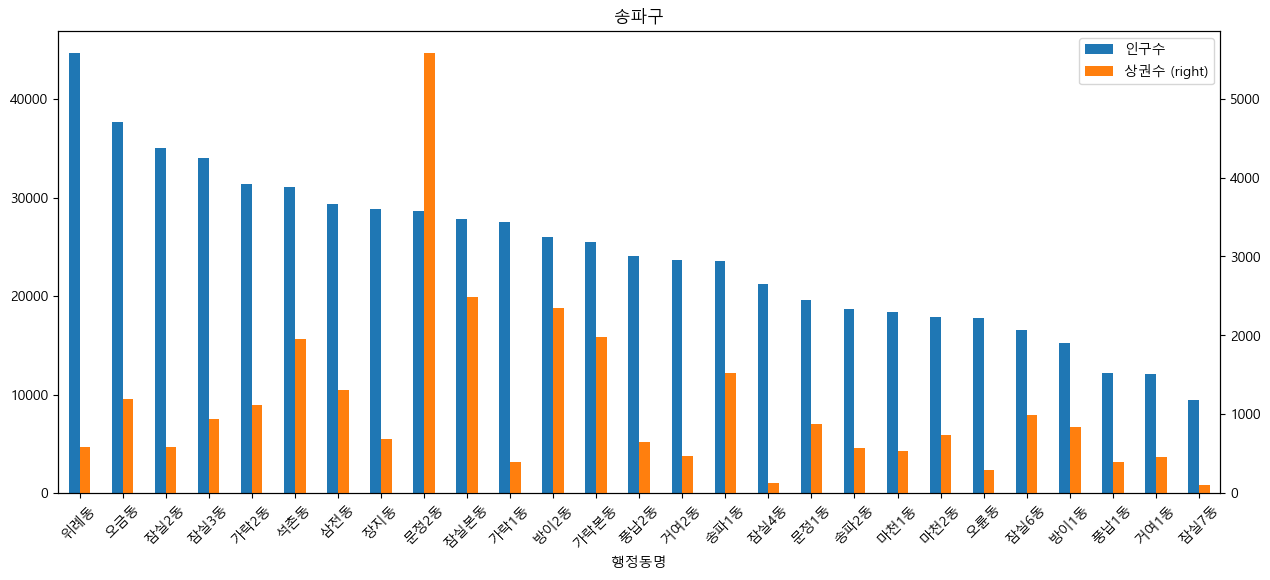

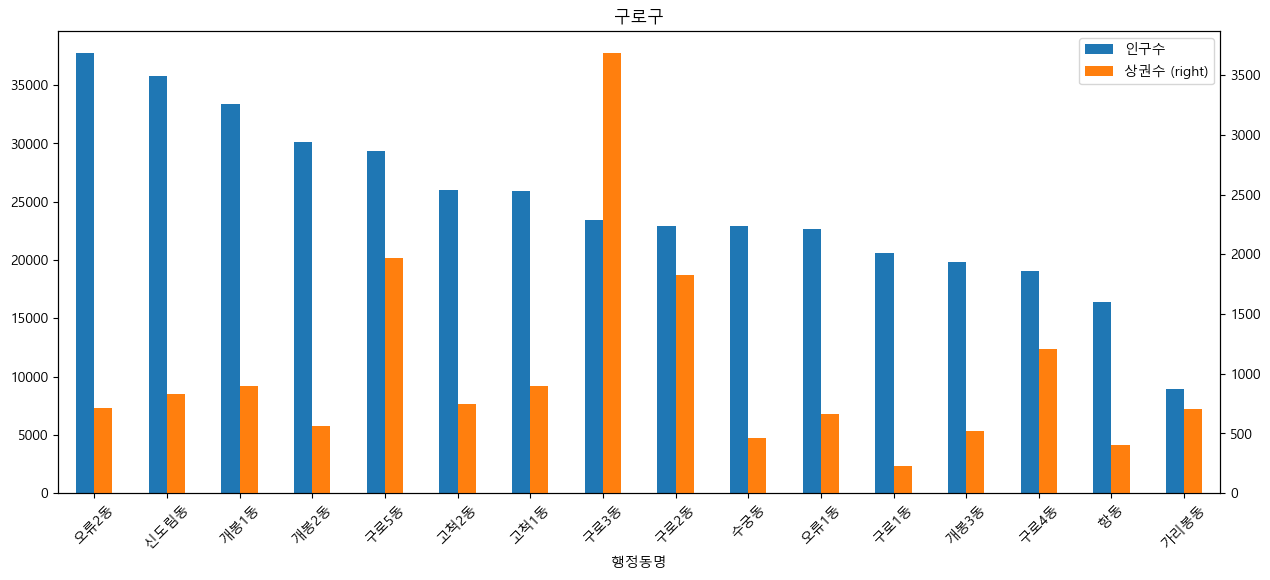

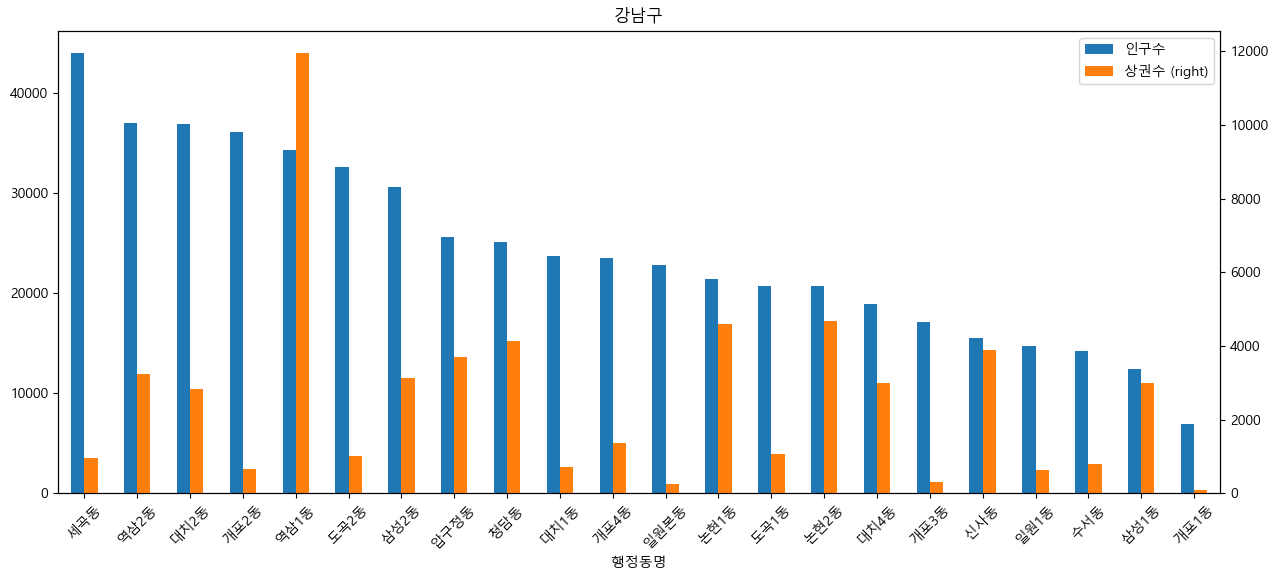

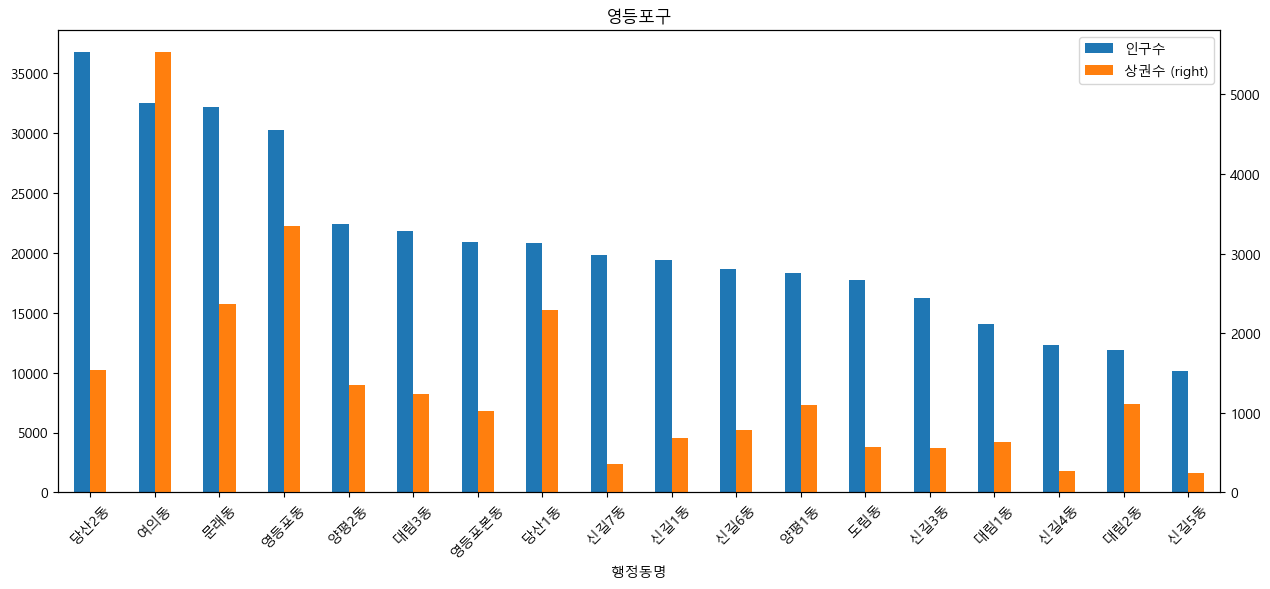

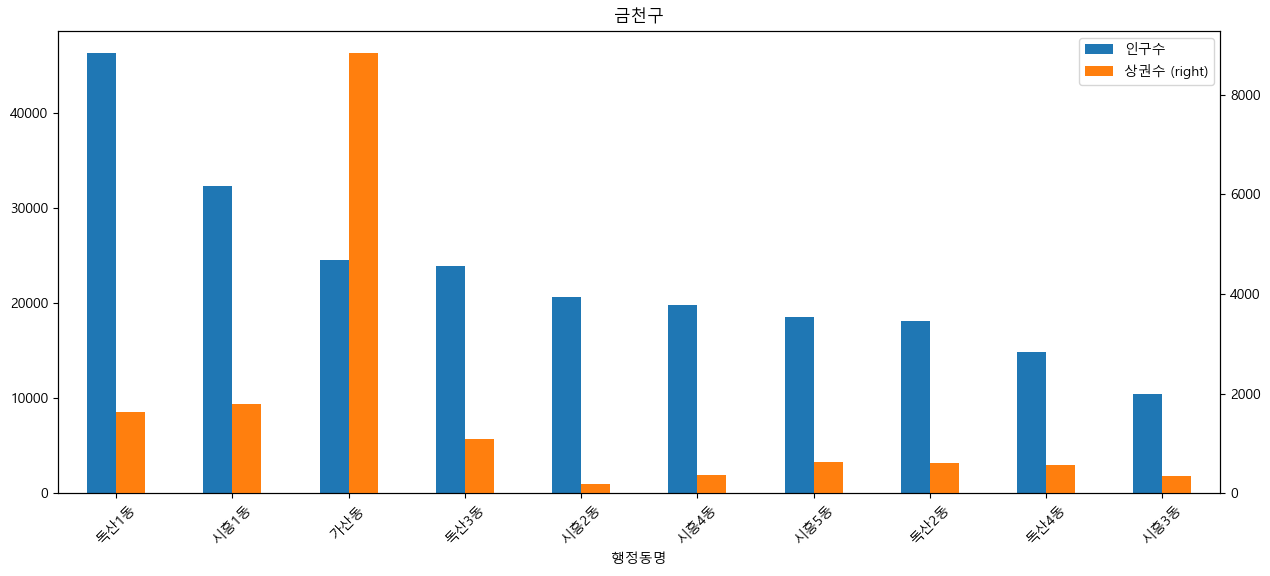

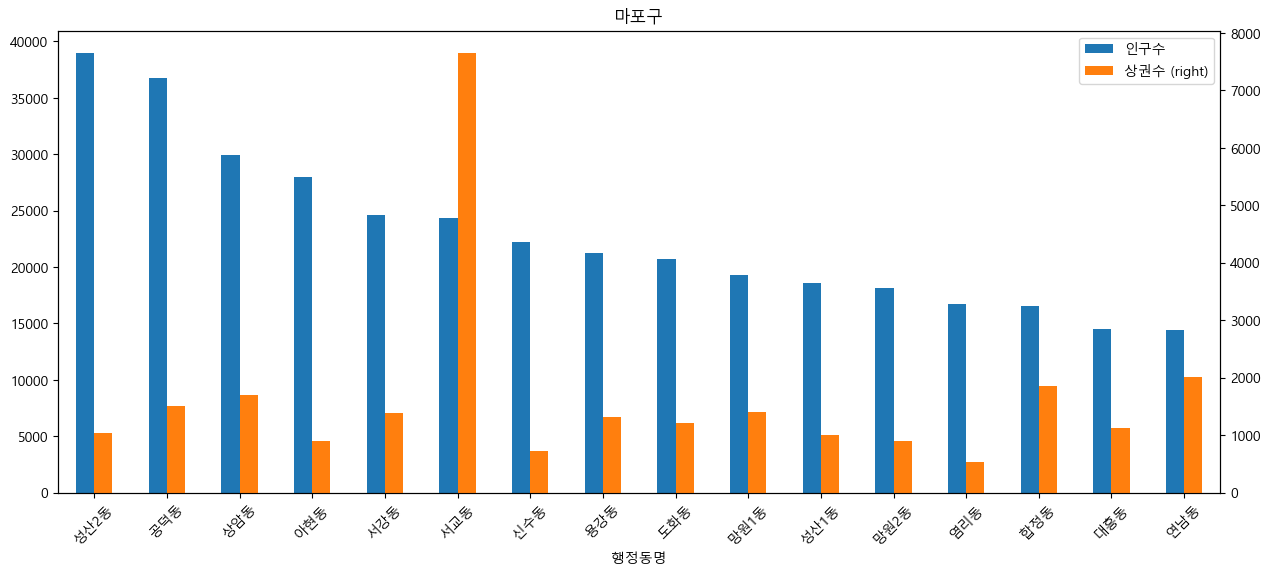

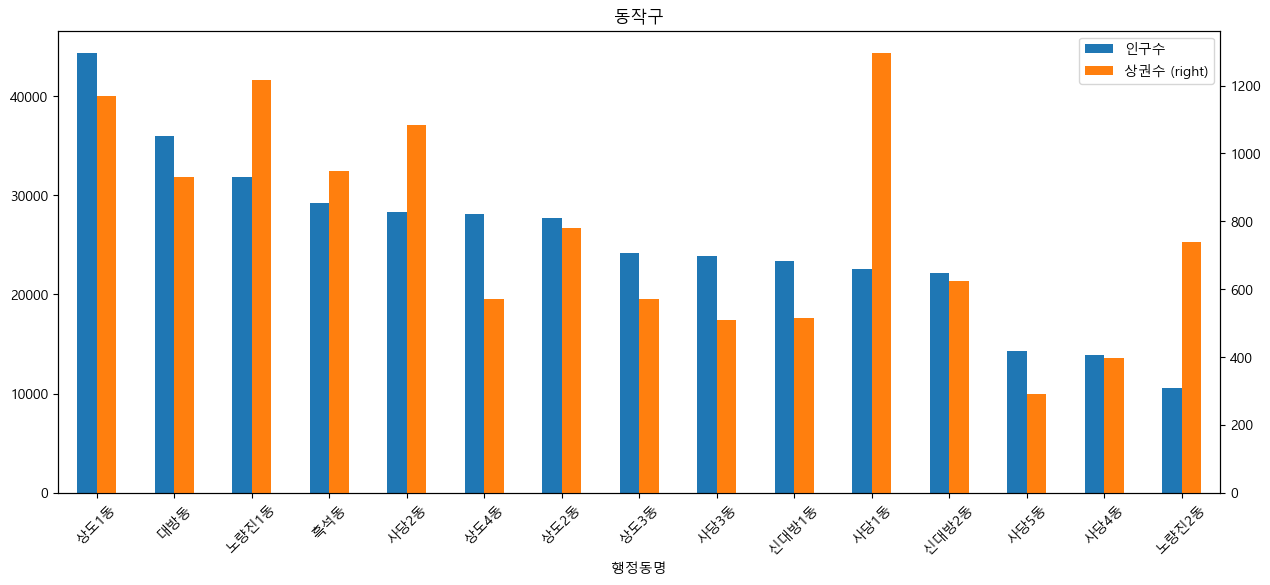

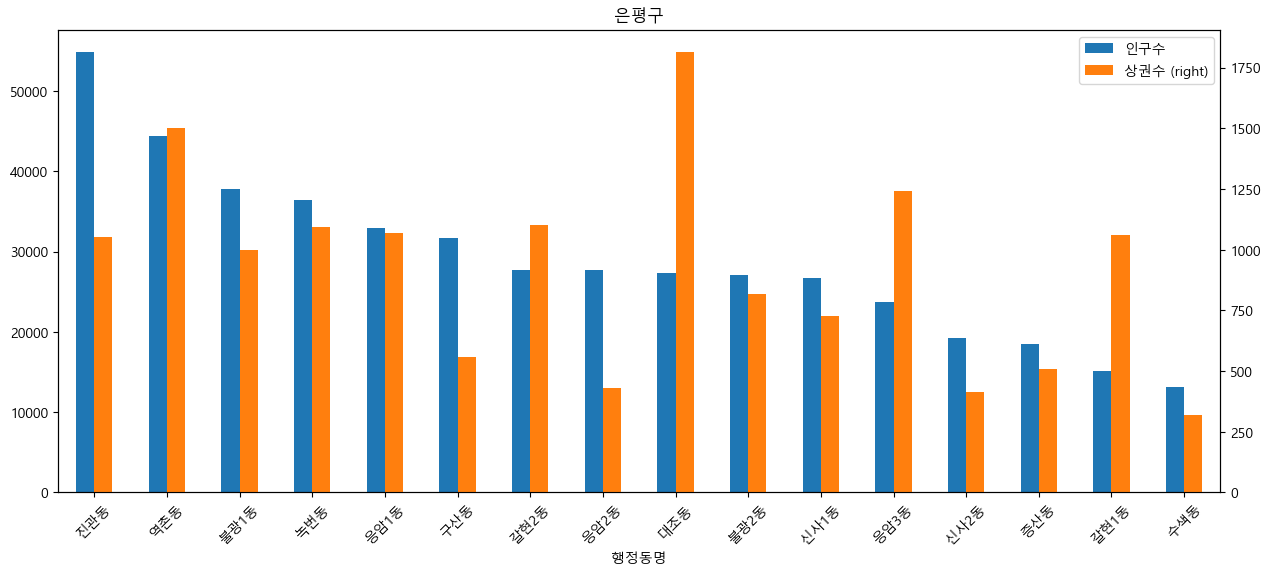

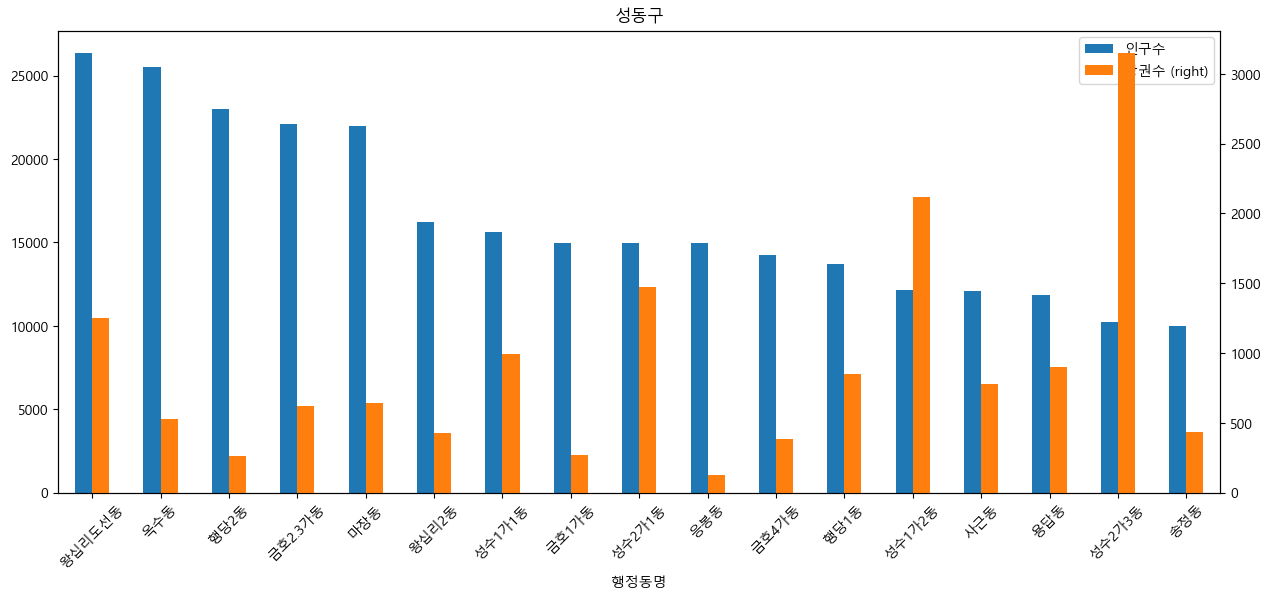

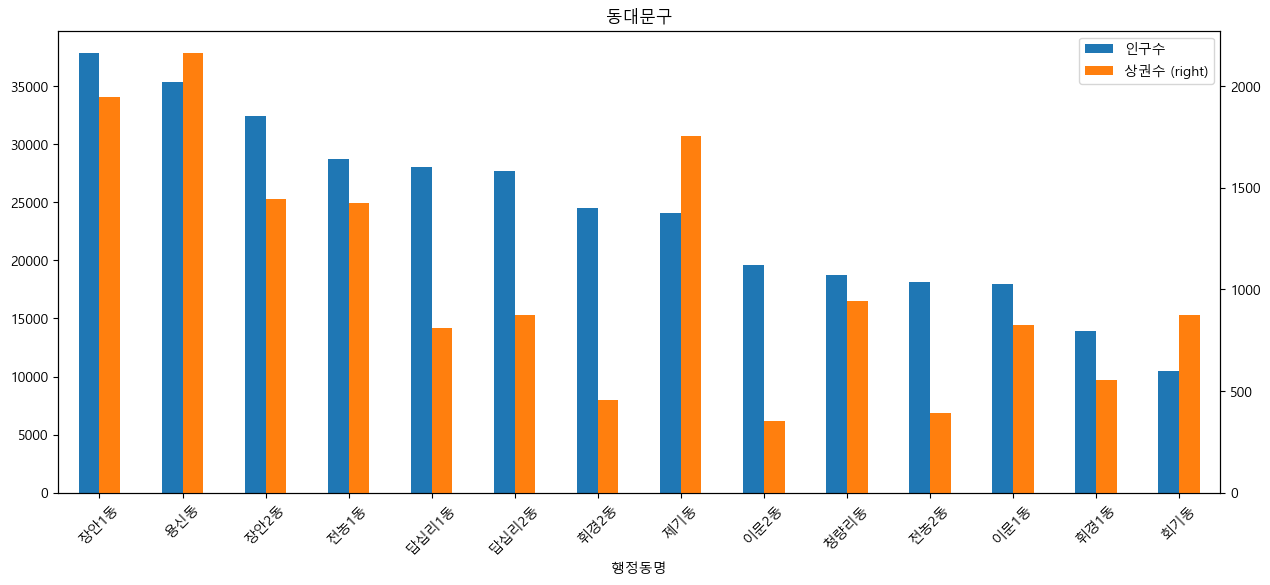

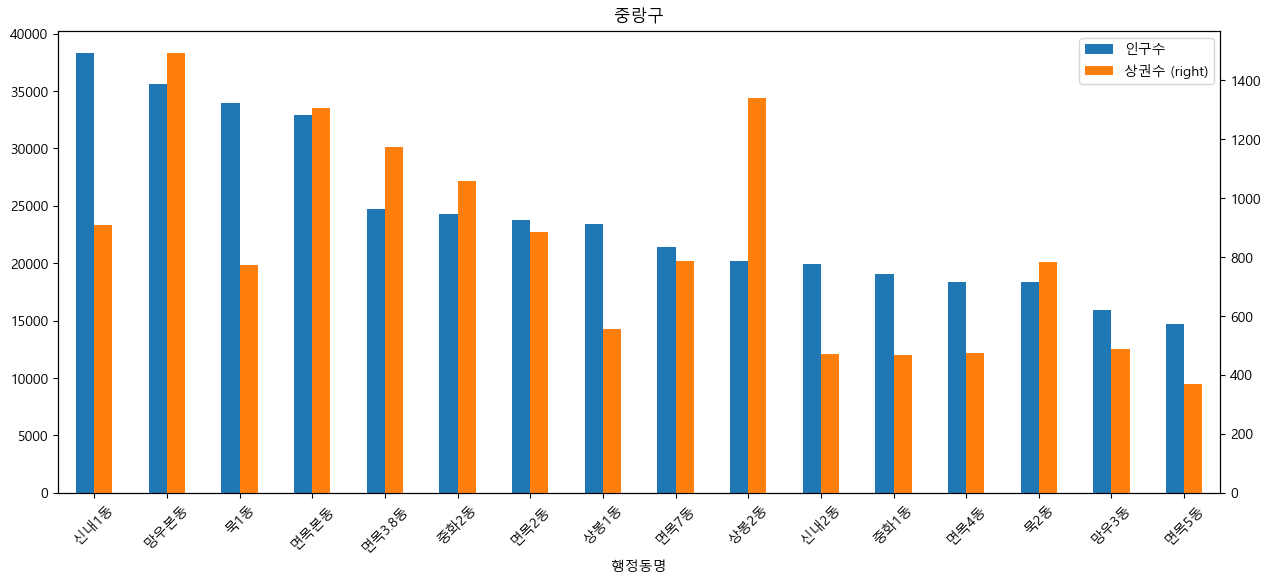

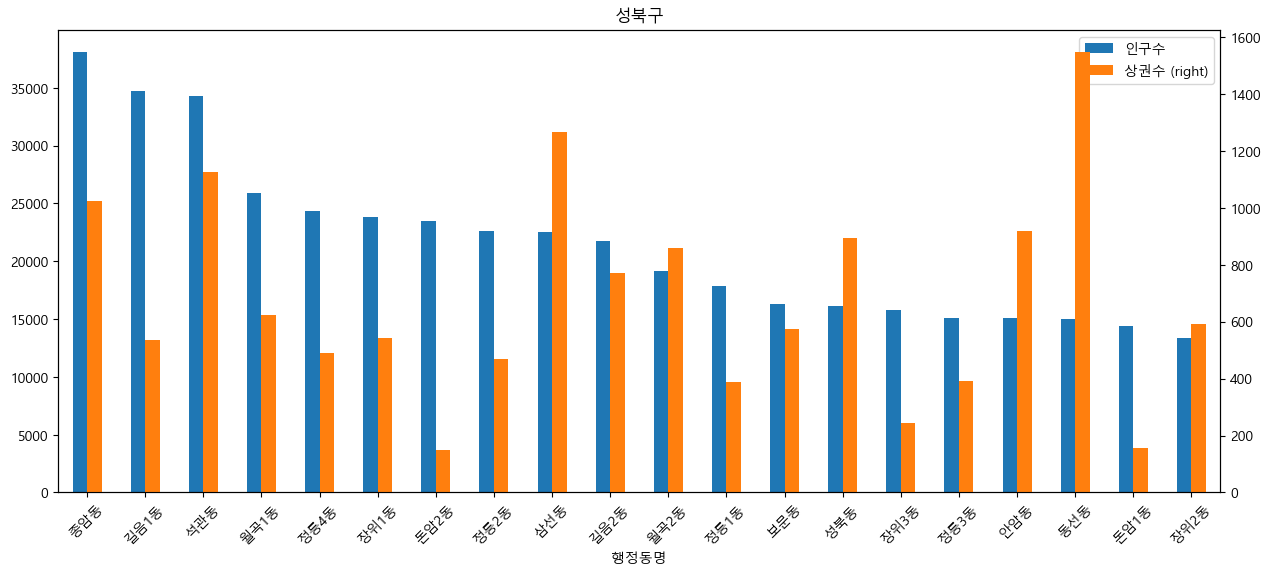

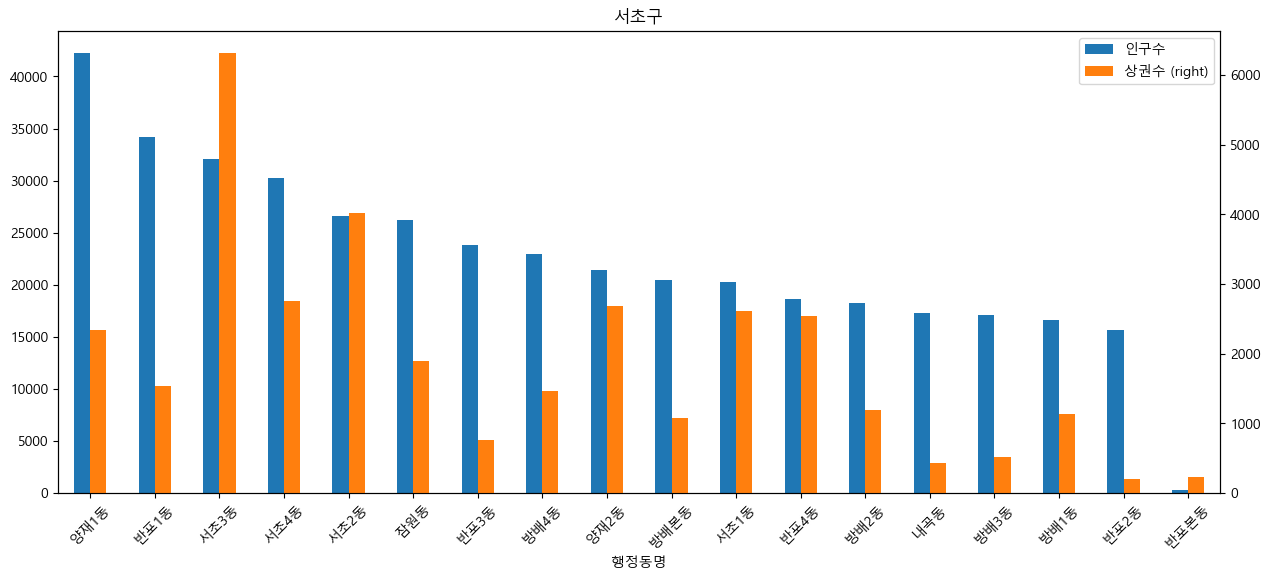

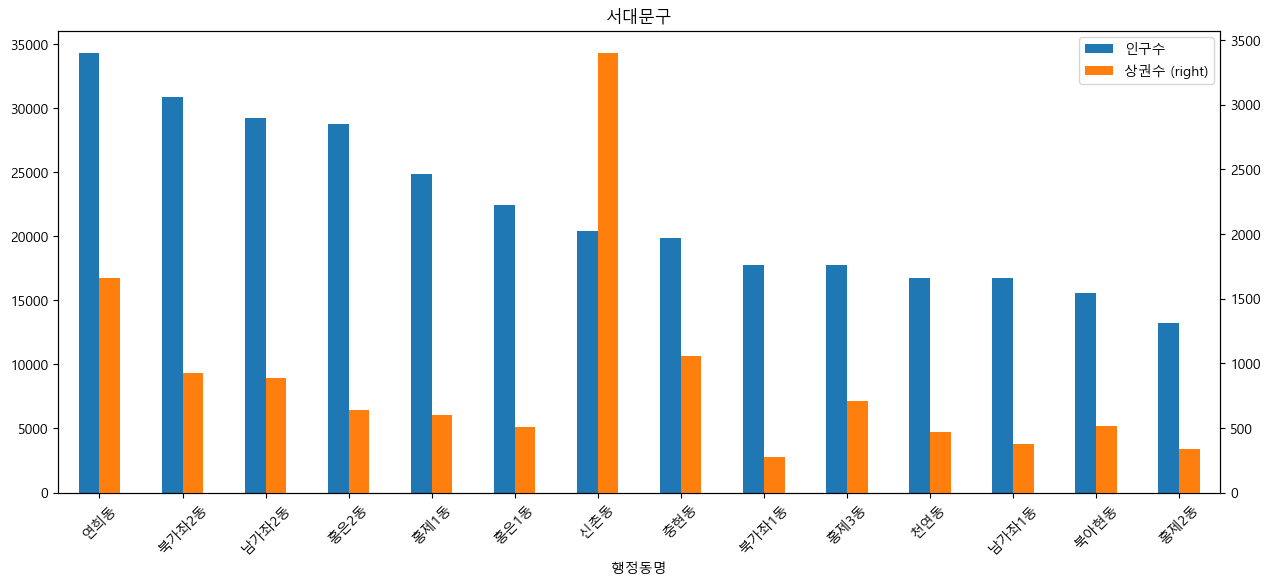

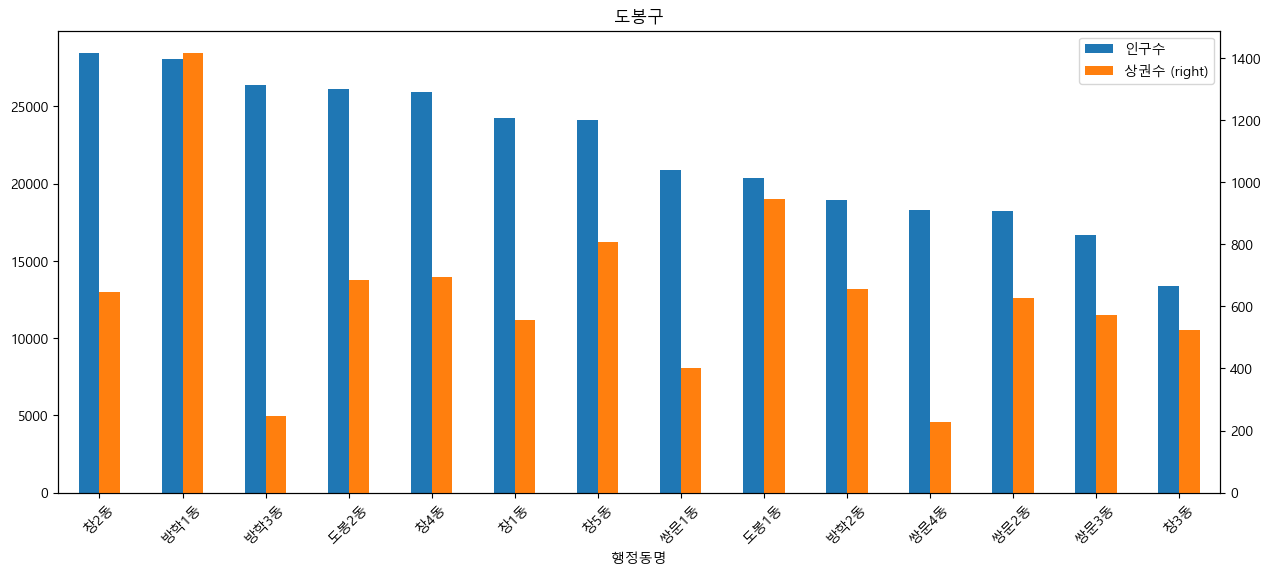

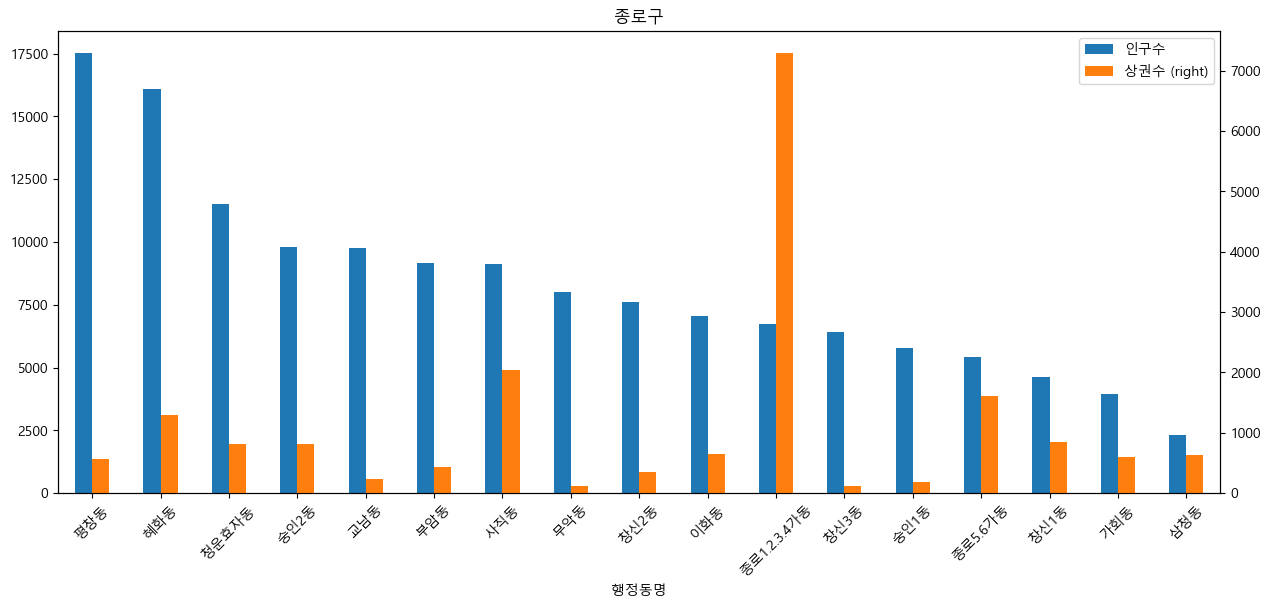

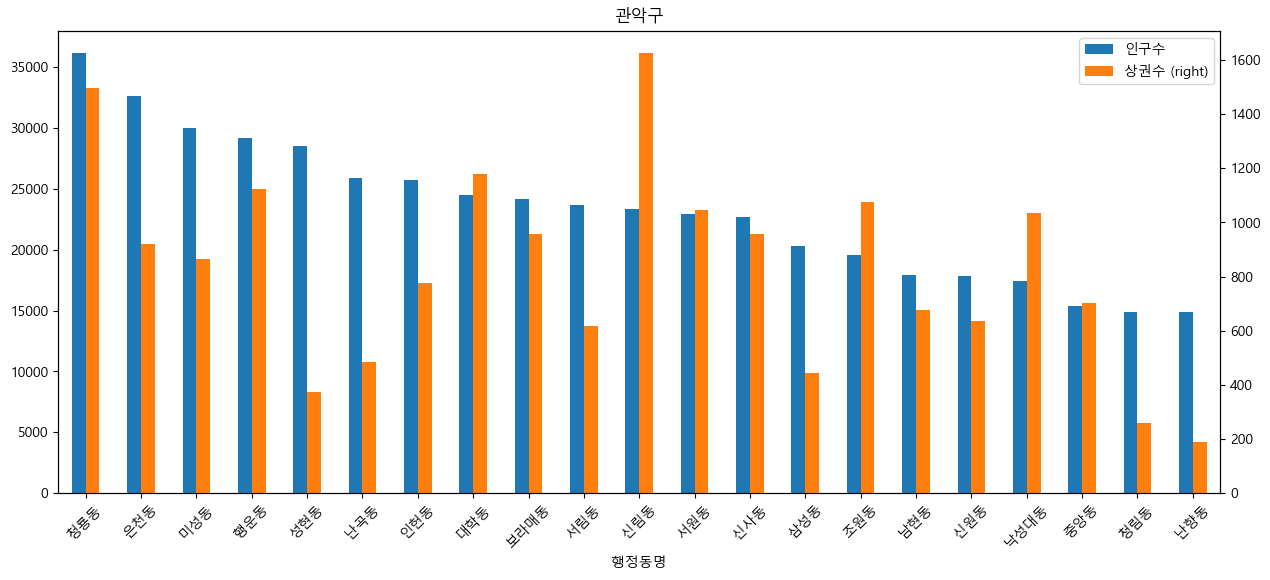

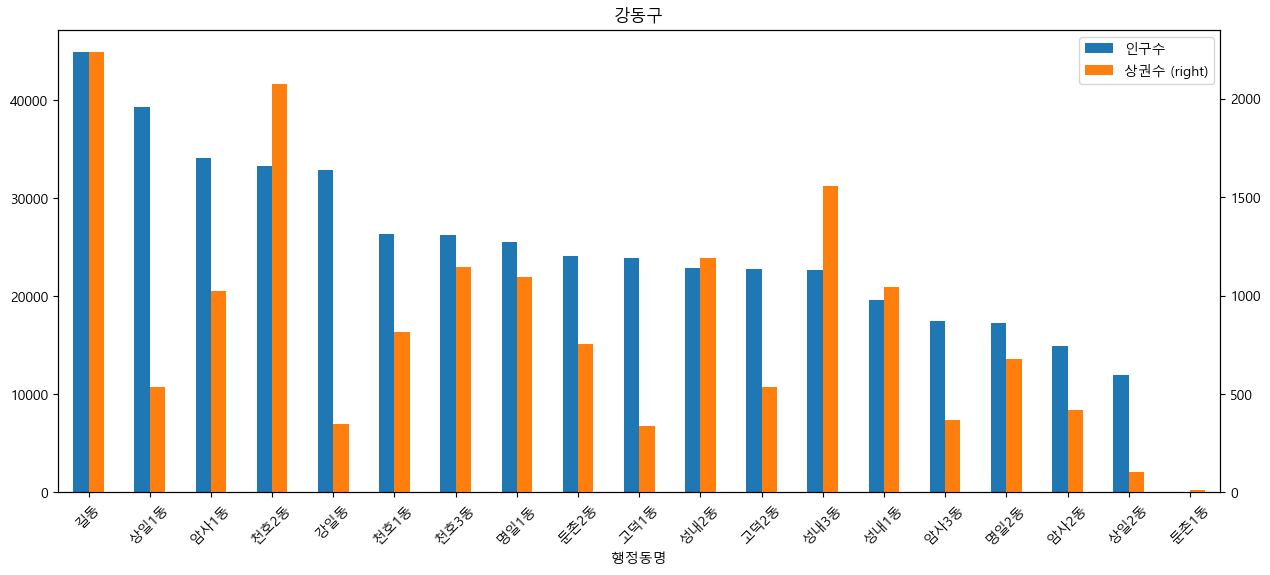

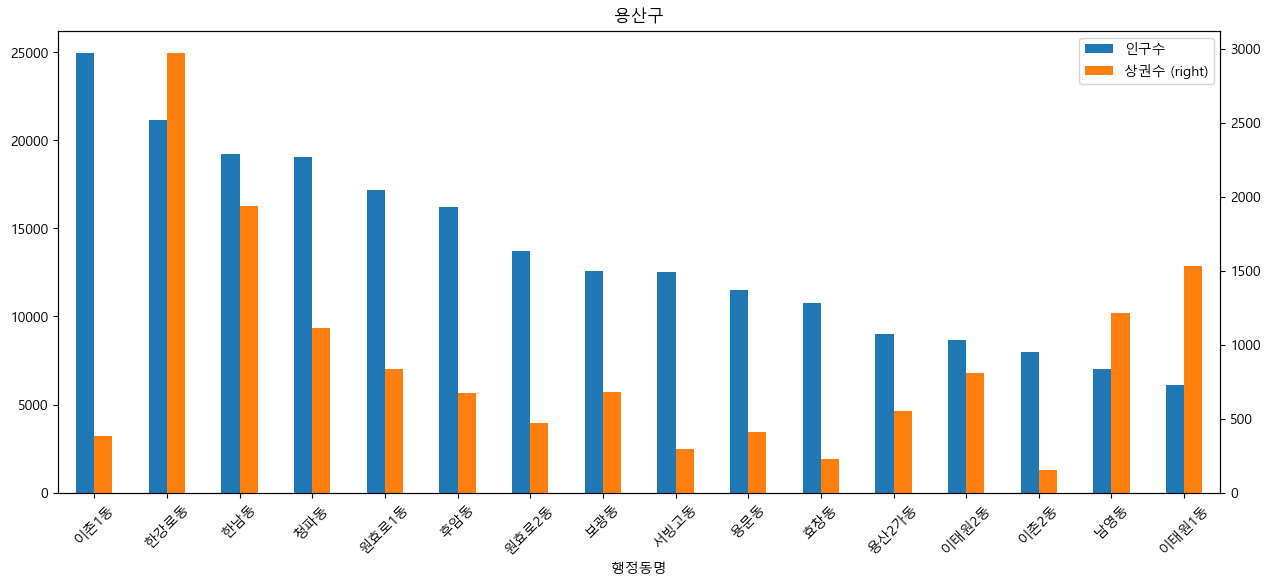

In [167]:
for index in seoul_gu:
    g_mks_hsd.loc[index].sort_values(by='인구수',ascending=False).sum(axis=1).to_frame().T.unstack().reset_index().rename(columns={0 : '상권수'}).drop(columns=['level_2']).plot(kind='bar',
                                                                                                                                                                                  x='행정동명',
                                                                                                                                                                                  secondary_y='상권수',
                                                                                                                                                                                  rot=45, 
                                                                                                                                                                                  figsize=(15,6),
                                                                                                                                                                                  title = index)
    plt.show()

In [154]:
# 문제 발생 행정동명에 '제'가들어가는 동들의 '제'를 제거했더니 , 제기동이 있었음 ... 
# 지우고 싶은것 '제1동','제2동' 인데 제기동의 '제'도 같이 제거됨....
# 위쪽에서 해결필요
# 제기동뿐만 아니라 다른 동들도 몇개 있음 해결필요
# 홍제1동, 홍제2동, 홍제3동 의 제도 삭제됨 .... 

- 서울의 각 지역별 상권이 가장 많은 곳은 번화가,상업지구다.
    - 정보 출처 : https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EC%9D%98_%EC%A7%80%EC%97%AD_%EA%B5%AC%EC%A1%B0
                  https://namu.wiki/w/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/%EC%83%81%EA%B6%8C